#**Importing necessary modules & packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#**Importing Dataset**

#Reading dataset

In [3]:
df = pd.read_csv("BD_EQ.csv")
df.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2021,11,20,07:42:12,25.9469,91.5133,34.2,4.1,INDIA-BANGLADESH BORDER REGION,1637394132
1,2021,7,9,07:46:23,25.9749,90.3995,10.0,4.3,INDIA-BANGLADESH BORDER REGION,1625816783
2,2021,7,7,03:15:24,25.9603,90.3499,10.0,5.3,INDIA-BANGLADESH BORDER REGION,1625627724
3,2021,2,24,18:16:46,20.0522,91.0042,10.0,4.5,BAY OF BENGAL,1614190606
4,2020,11,2,19:43:17,25.7773,91.1728,10.0,4.5,INDIA-BANGLADESH BORDER REGION,1604346197


In [4]:
# df = pd.read_csv("IEB_export_new.csv")
# df.head()

#Checking the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       646 non-null    int64  
 1   Month      646 non-null    int64  
 2   Day        646 non-null    int64  
 3   Time       646 non-null    object 
 4   Lat        646 non-null    float64
 5   Lon        646 non-null    float64
 6   Depth      646 non-null    float64
 7   Mag        646 non-null    float64
 8   Region     646 non-null    object 
 9   Timestamp  646 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 50.6+ KB


#Looking at the uniques entries of the "Region" column of the dataset

In [6]:
df["Region"].unique()

array(['INDIA-BANGLADESH BORDER REGION', 'BAY OF BENGAL', 'BANGLADESH',
       'MYANMAR-BANGLADESH BORDER REGION'], dtype=object)

#Filtering out the data irrelevant to Bangladesh and it's borders.

In [8]:
# bd_data = df[(df["Region"] == "BANGLADESH")|(df["Region"] == 'INDIA-BANGLADESH BORDER REGION')|(df["Region"] == 'BAY OF BENGAL')
#   |(df["Region"] == 'MYANMAR-BANGLADESH BORDER REGION')]

In [7]:
bd_data = df[(df["Region"] == "BANGLADESH")|(df["Region"] == 'INDIA-BANGLADESH BORDER REGION')|(df["Region"] == 'BAY OF BENGAL')
  |(df["Region"] == 'MYANMAR-BANGLADESH BORDER REGION')]

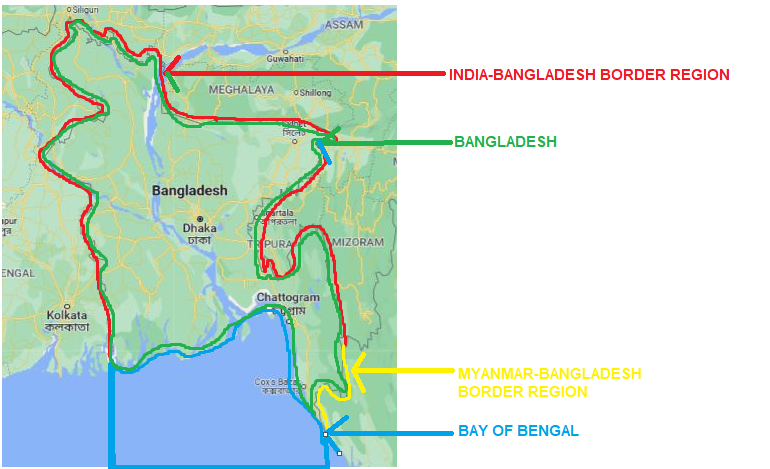


#Checking the new dataset

In [9]:
bd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       646 non-null    int64  
 1   Month      646 non-null    int64  
 2   Day        646 non-null    int64  
 3   Time       646 non-null    object 
 4   Lat        646 non-null    float64
 5   Lon        646 non-null    float64
 6   Depth      646 non-null    float64
 7   Mag        646 non-null    float64
 8   Region     646 non-null    object 
 9   Timestamp  646 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 50.6+ KB


In [10]:
bd_data.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2021,11,20,07:42:12,25.9469,91.5133,34.2,4.1,INDIA-BANGLADESH BORDER REGION,1637394132
1,2021,7,9,07:46:23,25.9749,90.3995,10.0,4.3,INDIA-BANGLADESH BORDER REGION,1625816783
2,2021,7,7,03:15:24,25.9603,90.3499,10.0,5.3,INDIA-BANGLADESH BORDER REGION,1625627724
3,2021,2,24,18:16:46,20.0522,91.0042,10.0,4.5,BAY OF BENGAL,1614190606
4,2020,11,2,19:43:17,25.7773,91.1728,10.0,4.5,INDIA-BANGLADESH BORDER REGION,1604346197


In [ ]:
# a=pd.Timestamp(1637394132, unit='s')
# pd.to_datetime(bd_data['Timestamp'], unit='s')

Taking only the considerable Richter scale reads into account.


Fact: Earthquakes that fall between 3.0 to 3.9 on the scale are considered minor. 

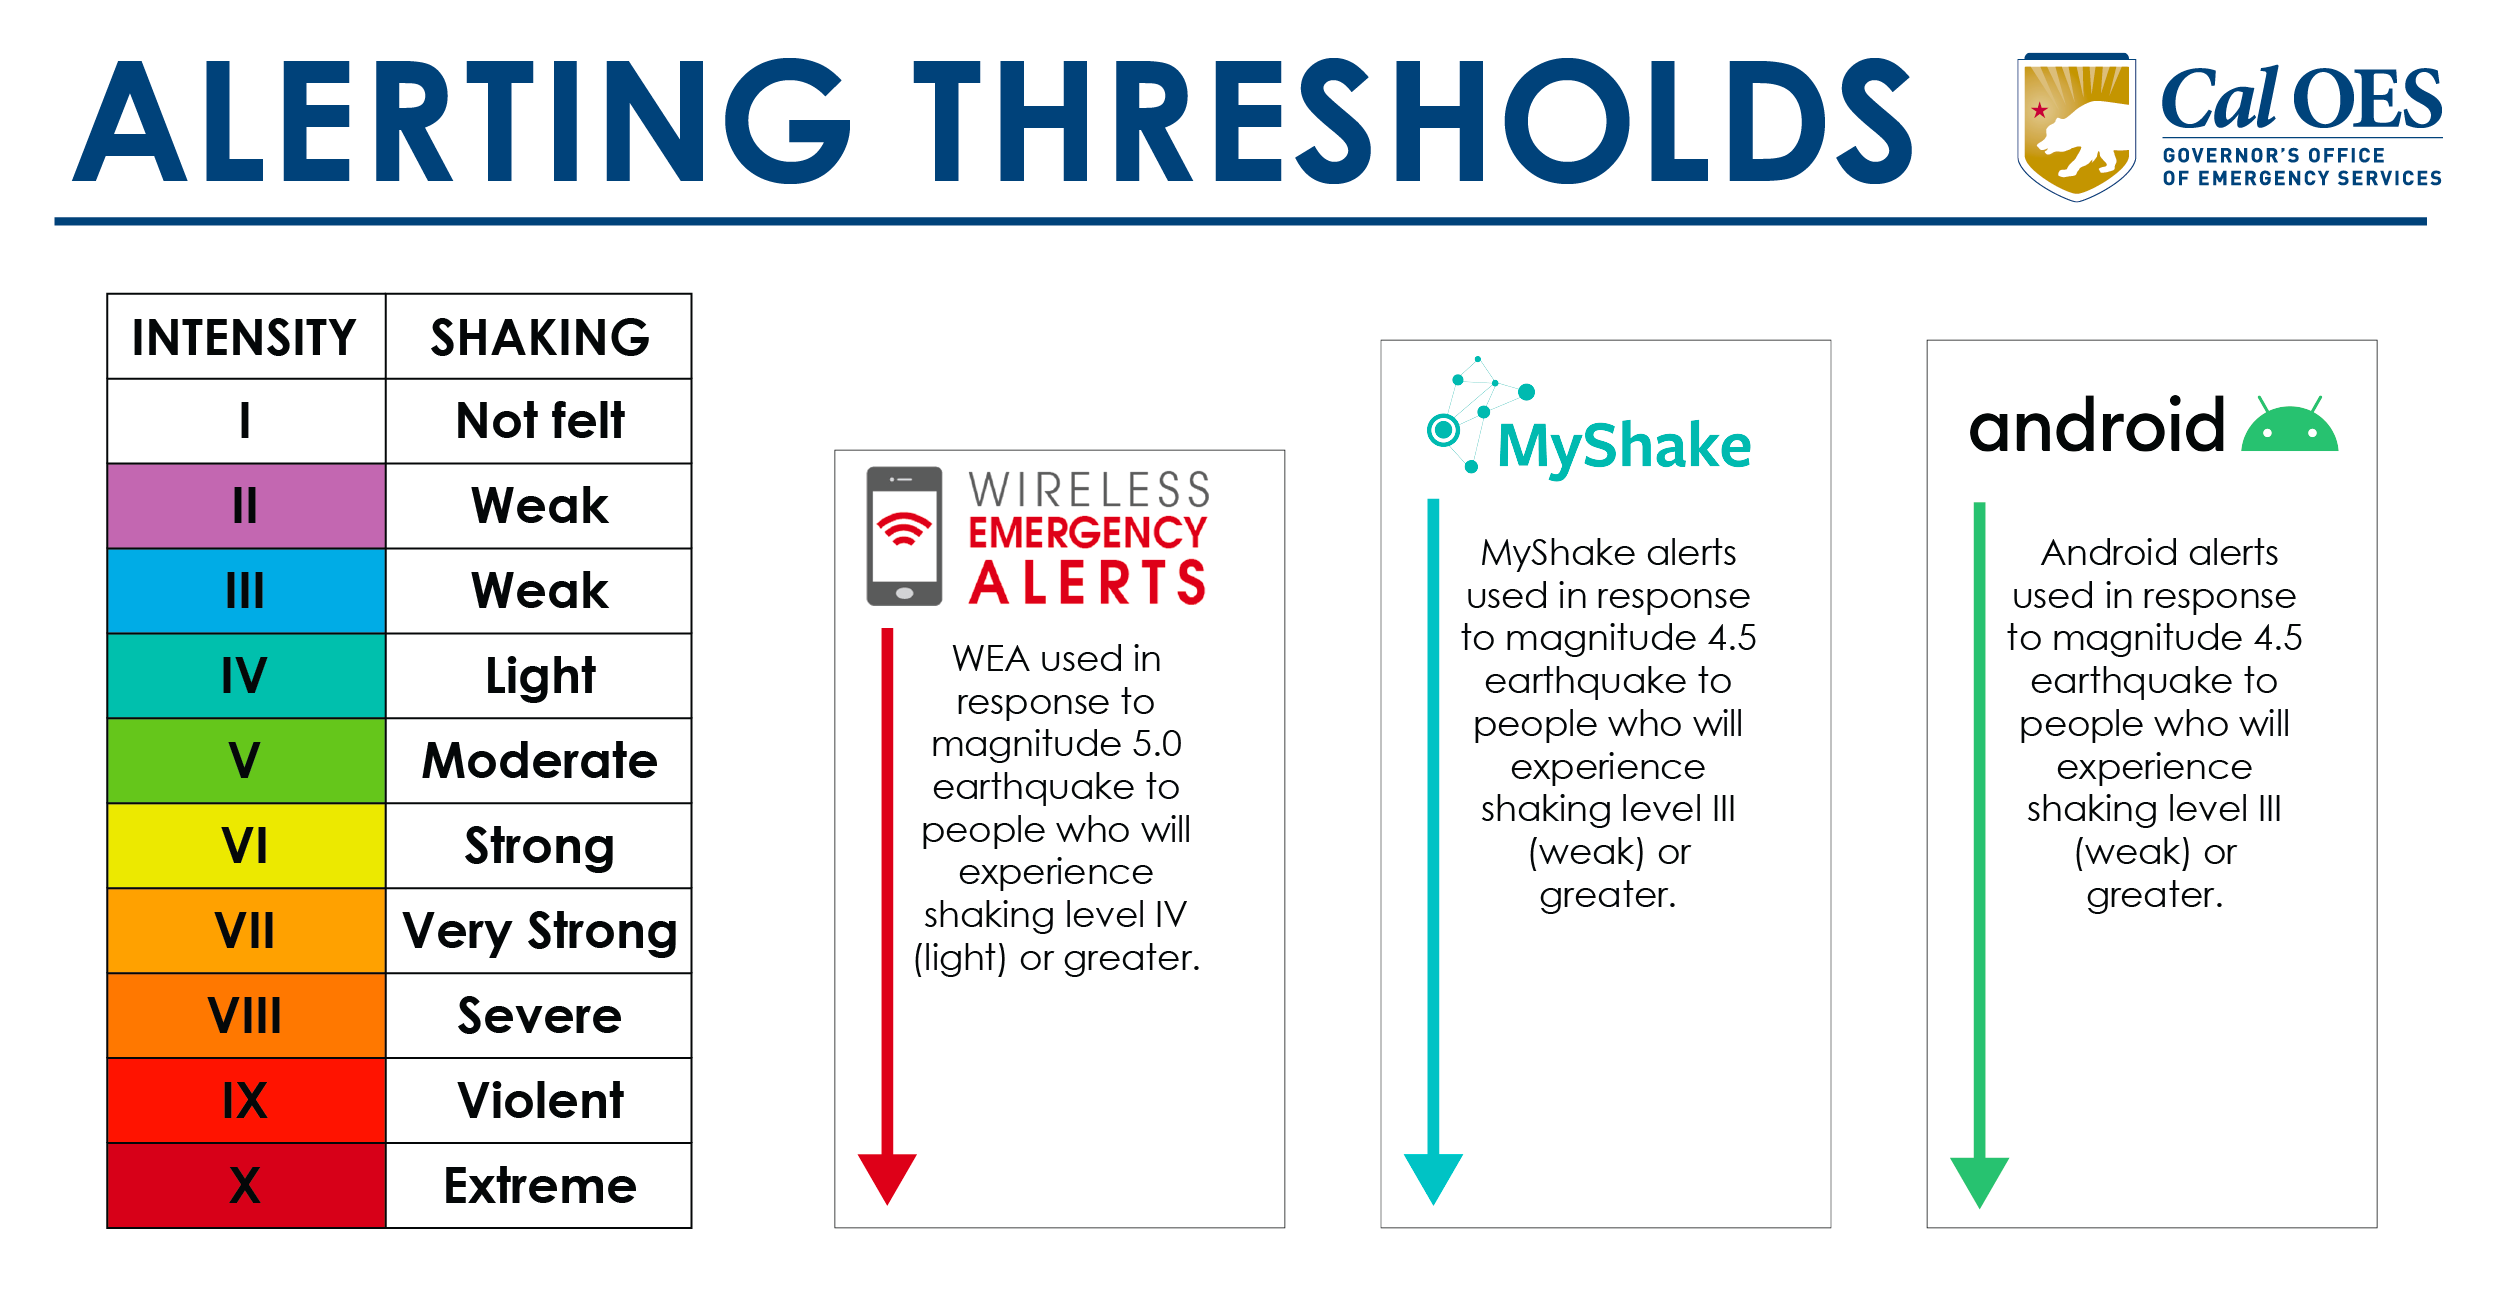

In [11]:
bd_data[bd_data['Mag'] >= 3.5]

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2021,11,20,07:42:12,25.9469,91.5133,34.2,4.1,INDIA-BANGLADESH BORDER REGION,1637394132
1,2021,7,9,07:46:23,25.9749,90.3995,10.0,4.3,INDIA-BANGLADESH BORDER REGION,1625816783
2,2021,7,7,03:15:24,25.9603,90.3499,10.0,5.3,INDIA-BANGLADESH BORDER REGION,1625627724
3,2021,2,24,18:16:46,20.0522,91.0042,10.0,4.5,BAY OF BENGAL,1614190606
4,2020,11,2,19:43:17,25.7773,91.1728,10.0,4.5,INDIA-BANGLADESH BORDER REGION,1604346197
...,...,...,...,...,...,...,...,...,...,...
641,1973,11,2,12:09:55,25.7216,91.7040,21.0,4.8,INDIA-BANGLADESH BORDER REGION,121090195
642,1973,10,31,12:06:47,25.2100,92.4503,33.1,4.3,INDIA-BANGLADESH BORDER REGION,120917207
643,1971,2,2,07:59:55,23.7137,91.6624,36.5,5.4,INDIA-BANGLADESH BORDER REGION,34329595
644,1970,8,28,01:24:07,24.7800,91.5500,39.0,4.9,INDIA-BANGLADESH BORDER REGION,20654647


Previously it was 646 entries but now, it has only 528 entries.

#Counting the earthquake magnitudes

<Figure size 1200x400 with 0 Axes>

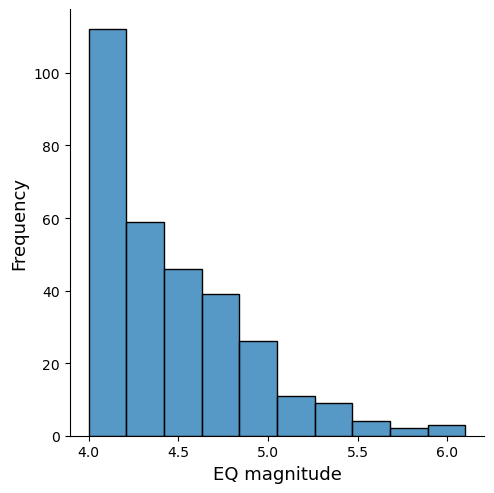

In [12]:
plt.figure(figsize=(12,4), dpi=100)
sns.displot(data=bd_data[bd_data['Mag'] >= 4],x='Mag',bins=10)
plt.xlabel("EQ magnitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
plt.show()

# Counting the earthquake depths

This depth refers to the depth at which an earthquake occurs or the focal depth. 

Earthquakes can occur anywhere between the Earth's surface and about 700 kilometers below the surface.
Earthquake depth range is divided into three zones: shallow, intermediate, and deep.

0-70 km deep => Shallow

70-300 km deep => Intermediate 

300-700 km deep => Deep

<Figure size 1200x400 with 0 Axes>

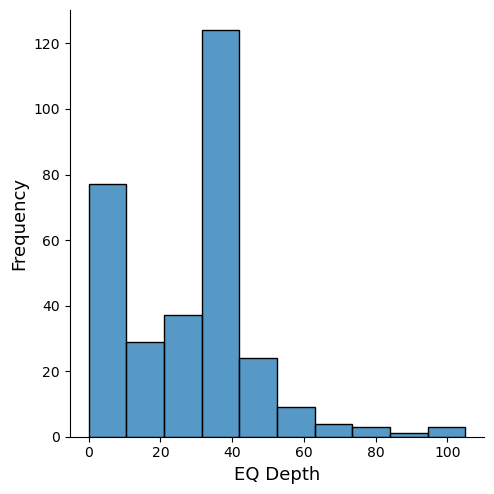

In [13]:
plt.figure(figsize=(12,4), dpi=100)
sns.displot(data=bd_data[bd_data['Mag'] >= 4],x='Depth', bins=10)
plt.xlabel("EQ Depth", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
plt.show()

# EQ Magnitude count corresponding to longitude

<Figure size 2400x800 with 0 Axes>

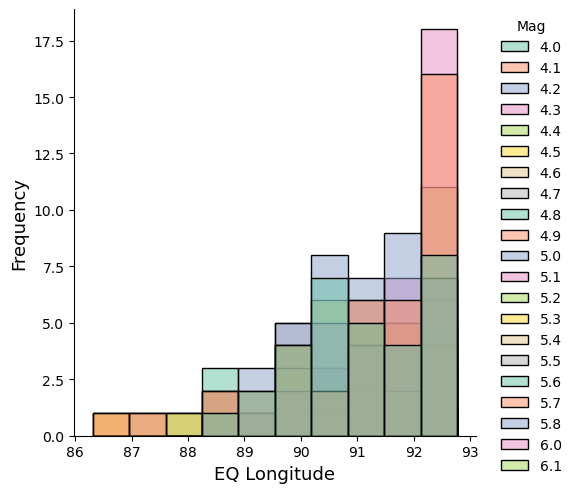

In [14]:
plt.figure(figsize=(12,4), dpi=200)
sns.displot(data=bd_data[bd_data['Mag'] >= 4],x='Lon',bins=10, hue="Mag", palette='Set2')
plt.xlabel("EQ Longitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
plt.show()

# EQ Magnitude count corresponding to latitude

<Figure size 2400x800 with 0 Axes>

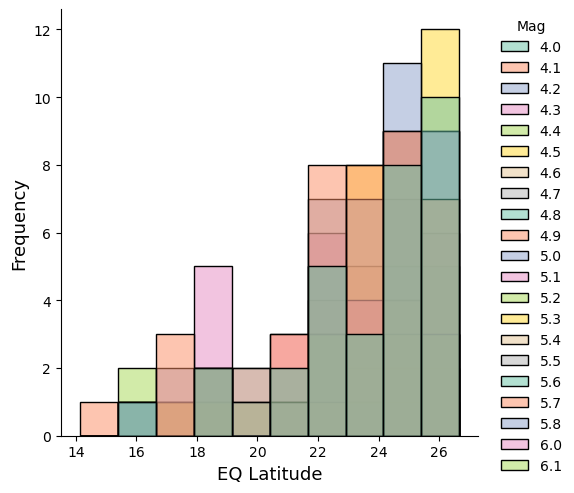

In [15]:
plt.figure(figsize=(12,4), dpi=200)
sns.displot(data=bd_data[bd_data['Mag'] >= 4],x='Lat',bins=10, hue="Mag", palette='Set2')
plt.xlabel("EQ Latitude", fontsize = 13);
plt.ylabel("Frequency", fontsize = 13);
plt.show()

# Relation & count between EQ depth and magnitude

<Figure size 1600x800 with 0 Axes>

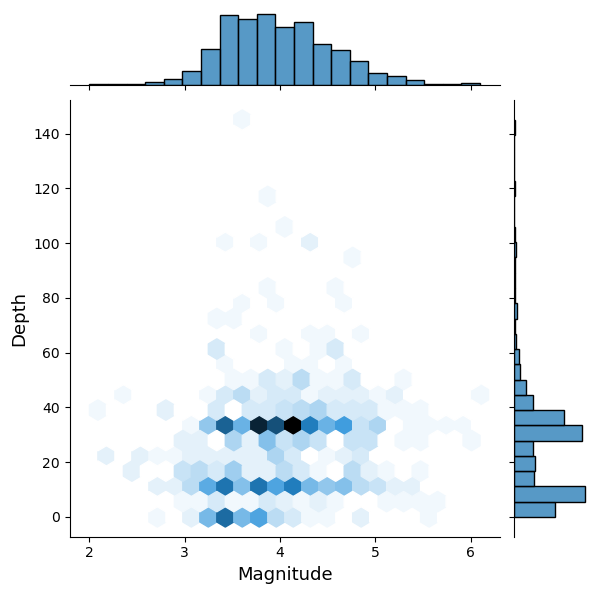

In [16]:
plt.figure(figsize=(16,8), dpi=100)
sns.jointplot(x='Mag',y='Depth',data=bd_data,kind='hex')
plt.xlabel("Magnitude", fontsize = 13);
plt.ylabel("Depth", fontsize = 13);
plt.show()

# Relation & count of EQ magnitudes corresponding to longitude and latitude

<Figure size 3200x1600 with 0 Axes>

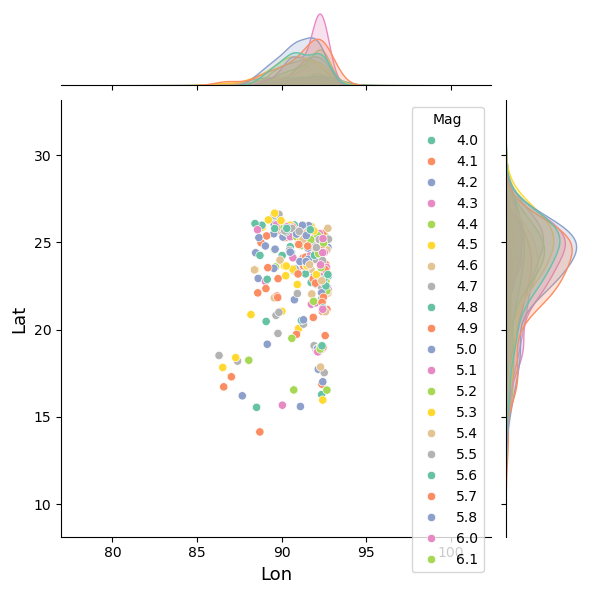

In [25]:
plt.figure(figsize=(16,8), dpi=200)
sns.jointplot(x='Lon',y='Lat',data=bd_data[bd_data['Mag'] >= 4], hue="Mag", palette='Set2')
plt.xlabel("Lon", fontsize = 13);
plt.ylabel("Lat", fontsize = 13);
plt.show()

# Considering only the light readings of the Richter scale into account.


Fact: Earthquakes of a magnitude 4.0 are typically can be felt at many places as far as 60 miles from where it occurred, and it infrequently causes damage near its source.

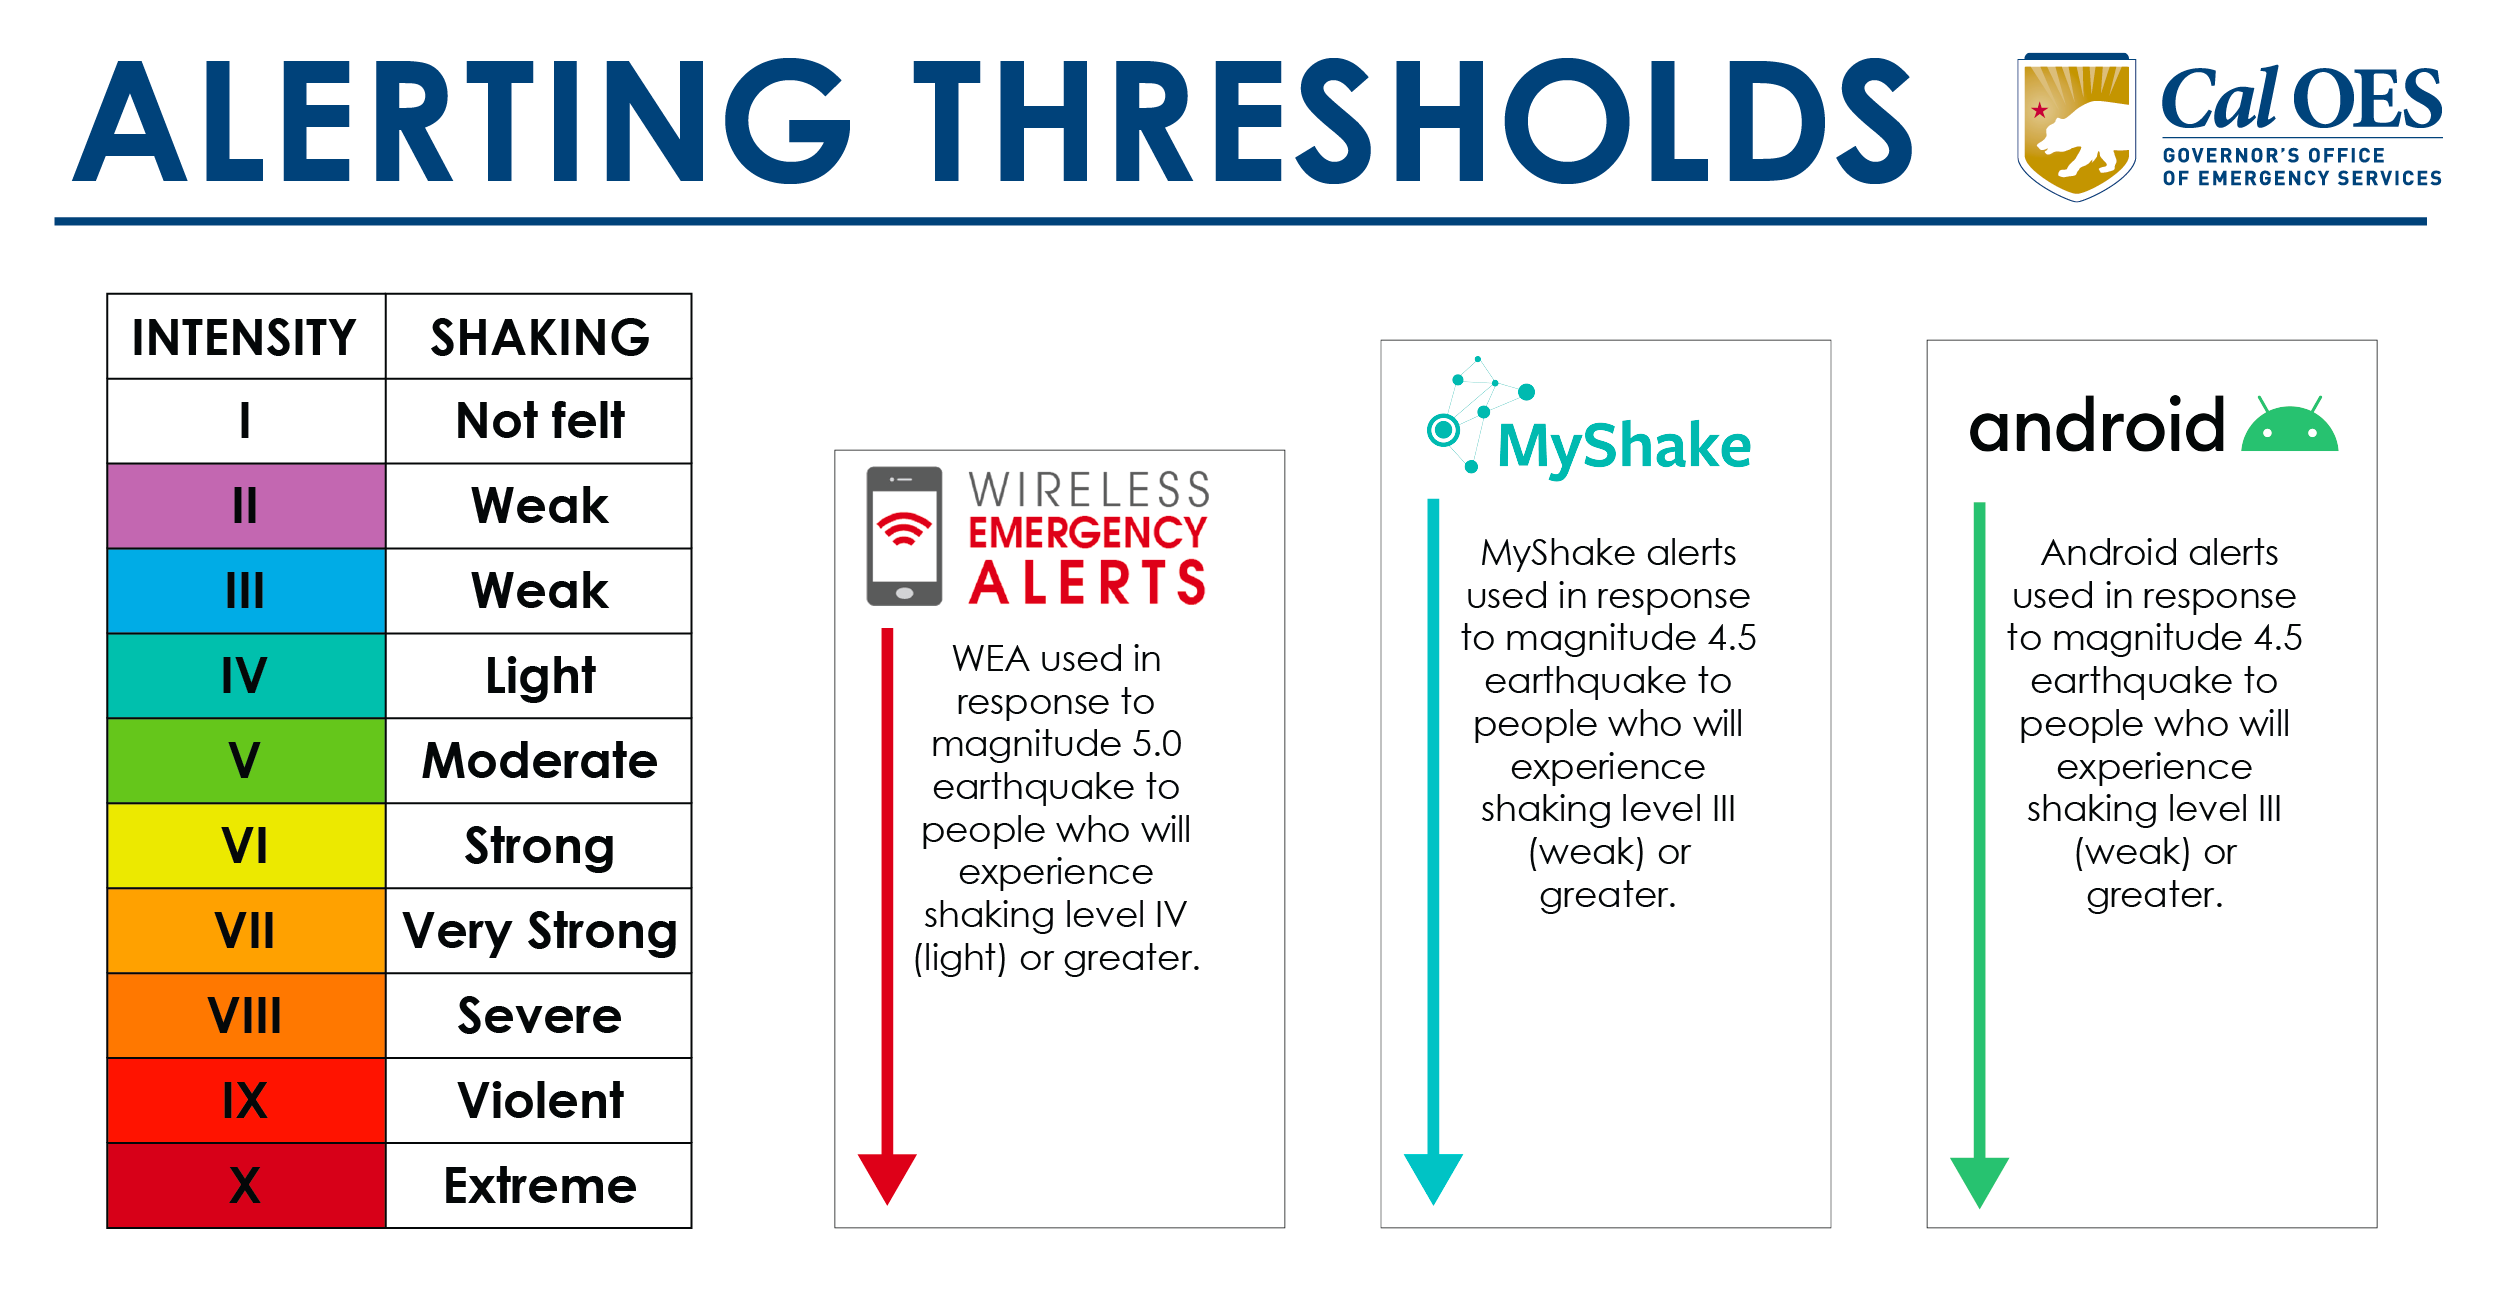

In [22]:
bd_data[bd_data['Mag'] >= 4]['Mag']

0      4.1
1      4.3
2      5.3
3      4.5
4      4.5
      ... 
641    4.8
642    4.3
643    5.4
644    4.9
645    5.1
Name: Mag, Length: 311, dtype: float64

# Checking the distribution of magnitude of the new dataset 

Result: Identical to Normal distribution.

Fact: Analagous to a histogram. kernel density estimate (KDE) represents the data using a continuous probability density curve in one or more dimensions.

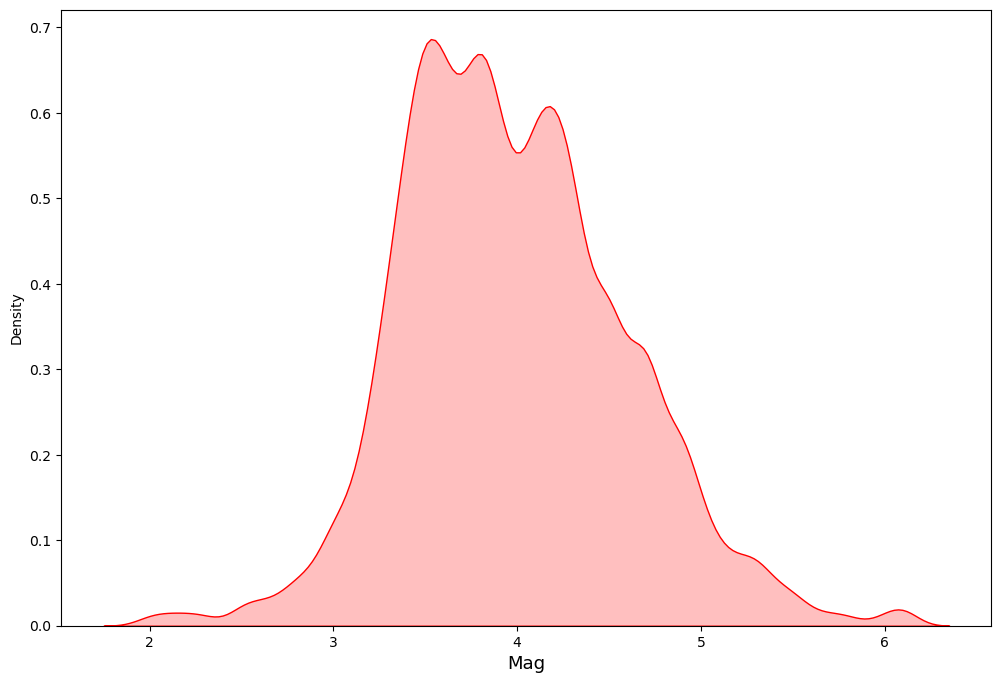

In [30]:
plt.figure(figsize=(12,8), dpi=100)
sns.kdeplot(data=bd_data,x='Mag',bw_adjust=0.5,fill=True,color='red')
plt.xlabel("Mag", fontsize = 13);
plt.show()

# Checking the distribution of depth of the new dataset 

Result: Identical to positive skew.

Fact: Analagous to a histogram. kernel density estimate (KDE) represents the data using a continuous probability density curve in one or more dimensions.

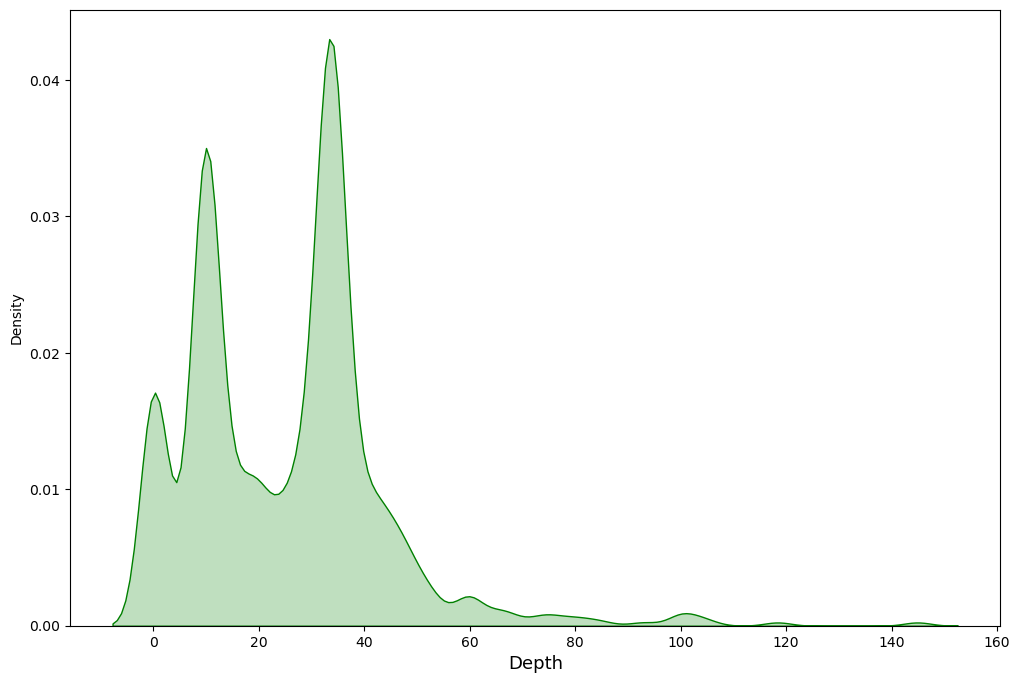

In [33]:
plt.figure(figsize=(12,8), dpi=100)
sns.kdeplot(data=bd_data,x='Depth',bw_adjust=0.5,fill=True,color='green')
plt.xlabel("Depth", fontsize = 13);
plt.show()

#Regionwise correlation between magnitude and depth

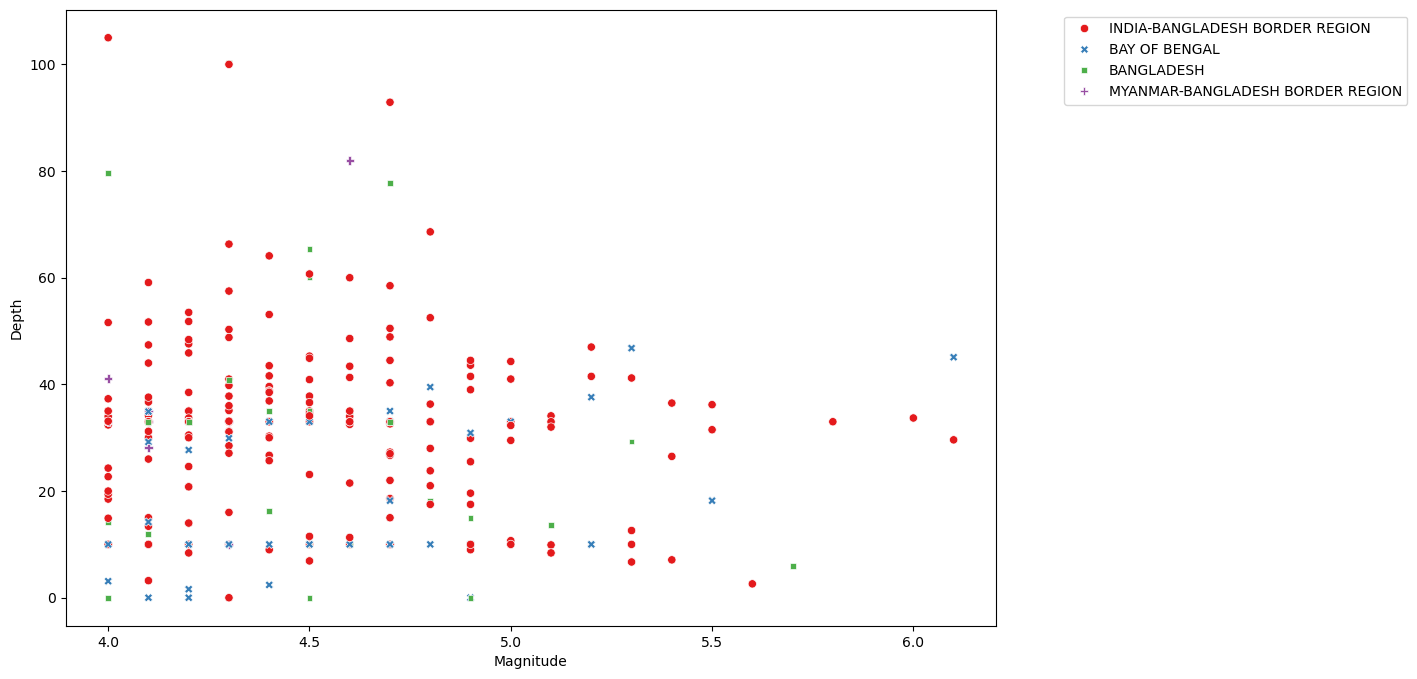

In [37]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='Mag',y='Depth',data=bd_data[bd_data['Mag'] >= 4],hue='Region', palette='Set1', style = "Region")
plt.xlabel("Magnitude")
plt.ylabel("Depth")
plt.legend(bbox_to_anchor=(1.45, 1))
plt.show()

# Magnitude of the earthquake according to the coordinates

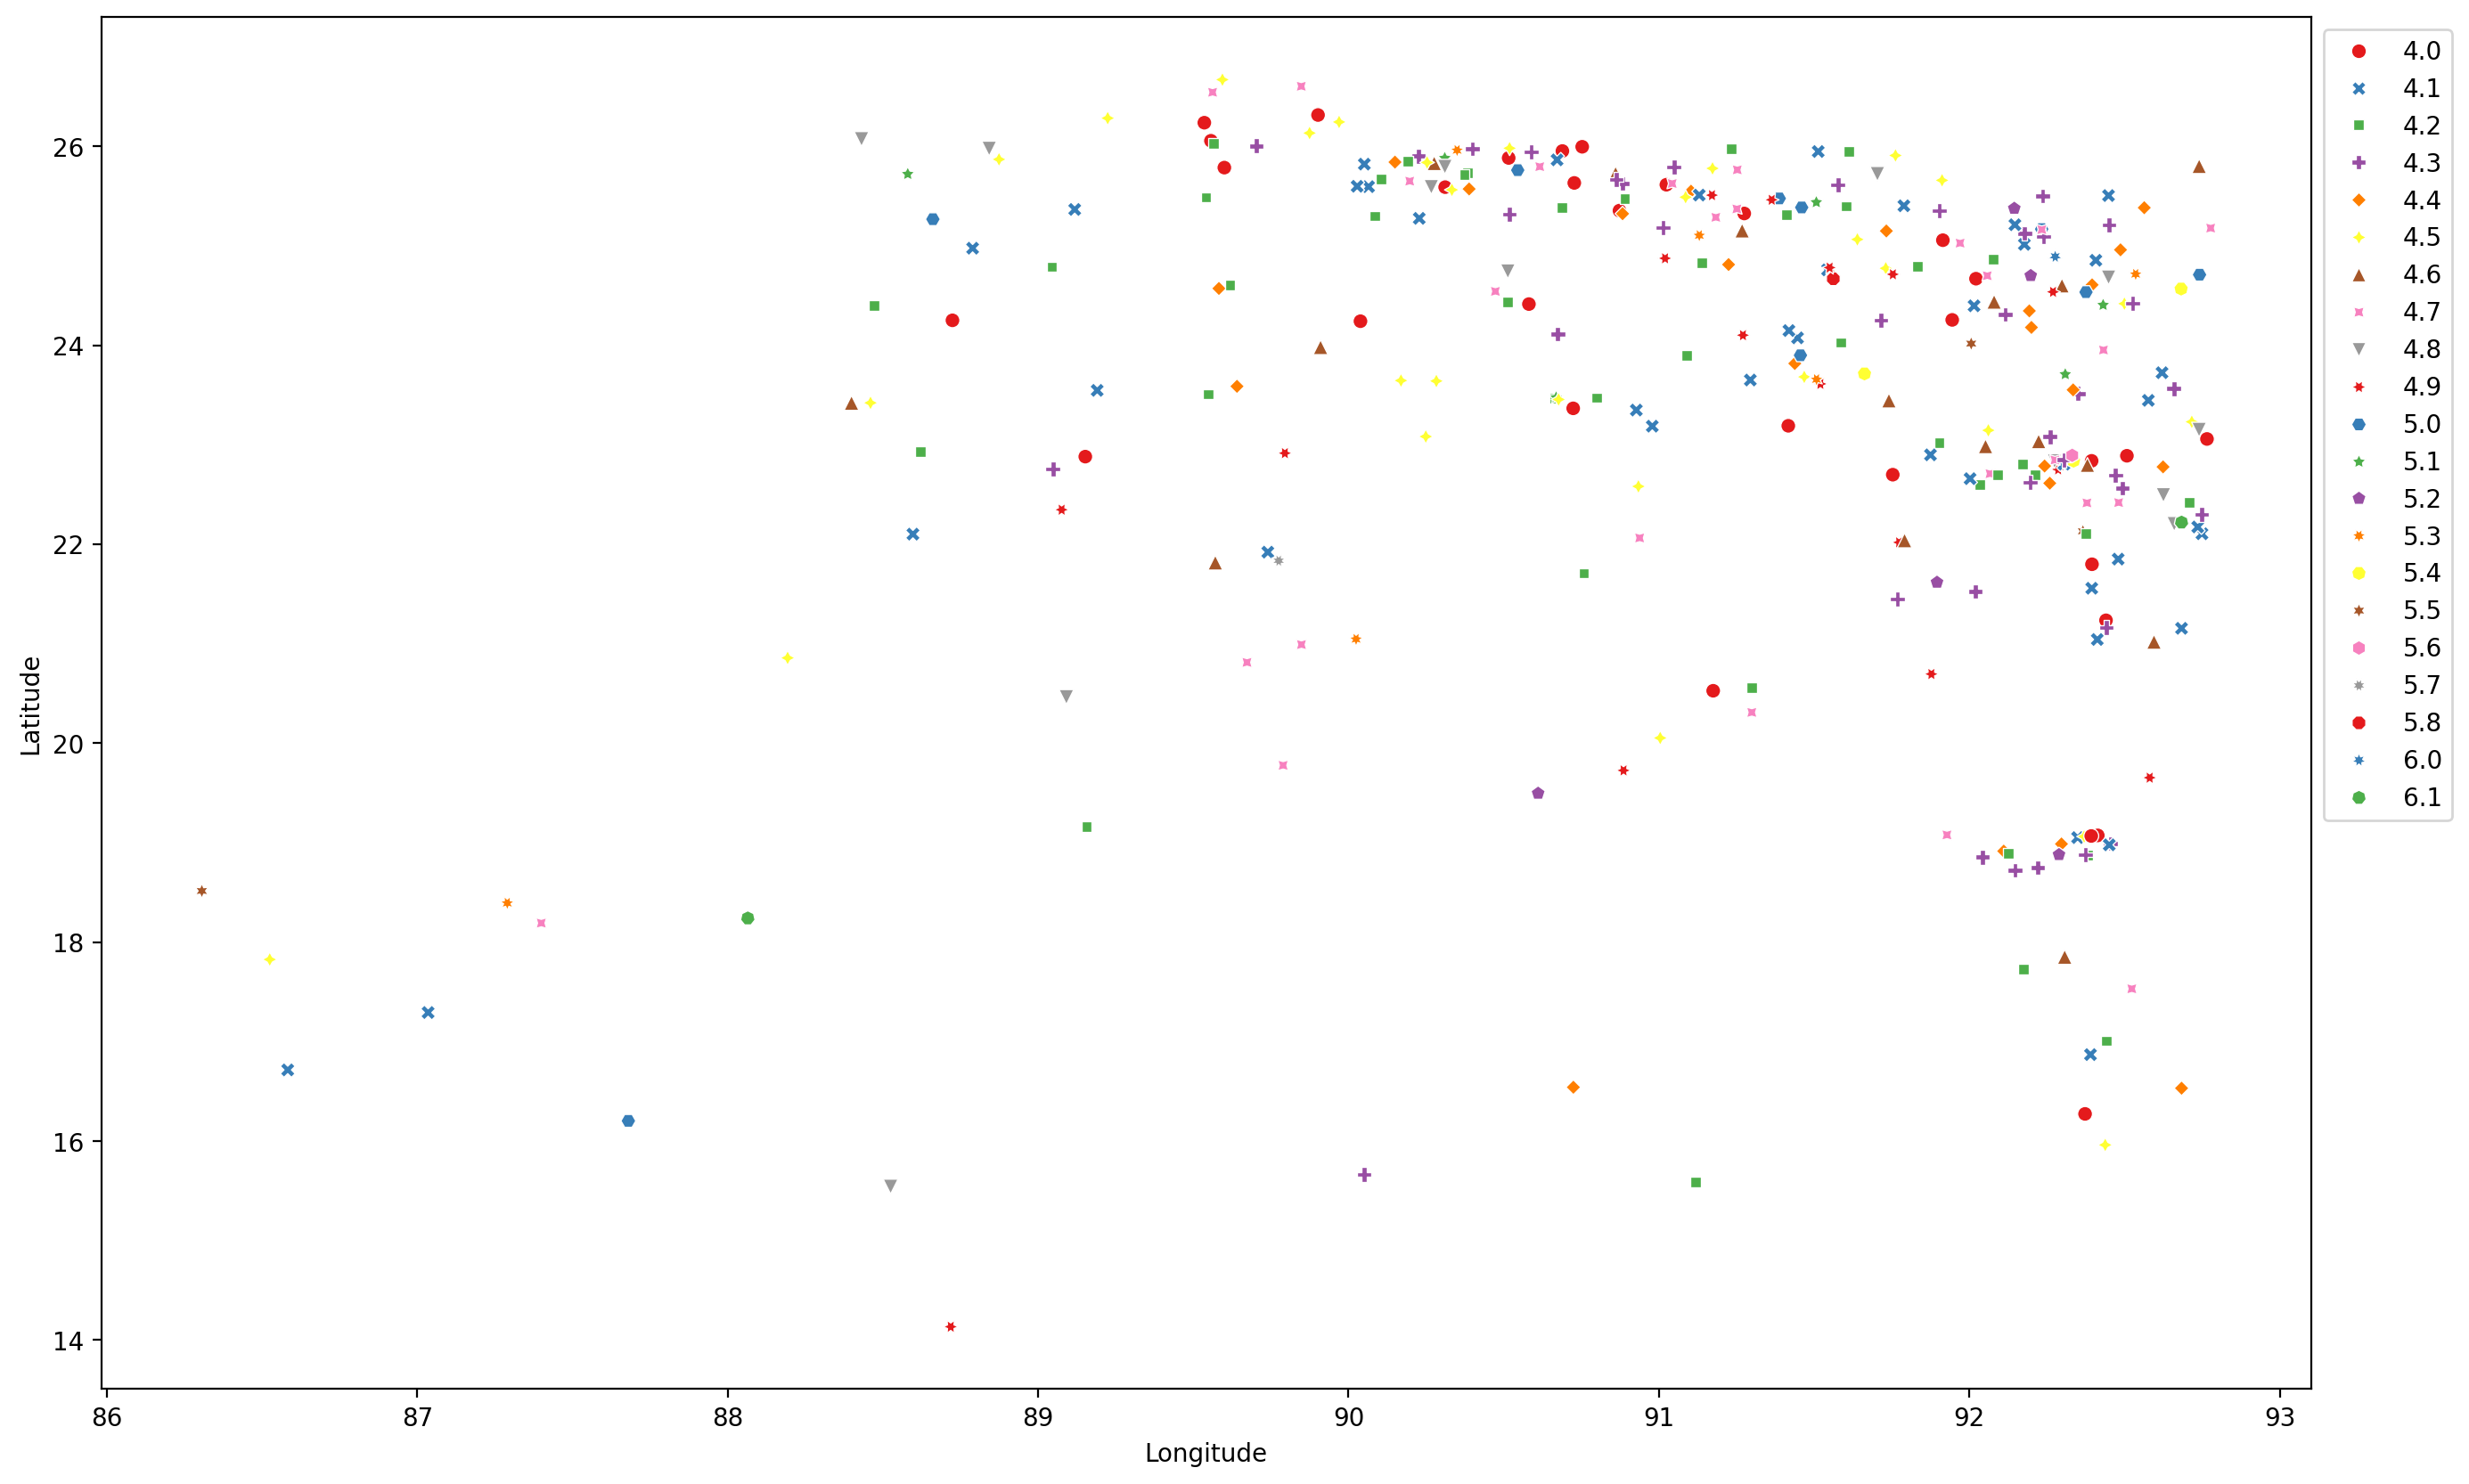

In [40]:
plt.figure(figsize=(16,10), dpi=200)
sns.scatterplot(x='Lon',y='Lat',data=bd_data[bd_data['Mag'] >= 4],hue='Mag', palette='Set1', style = "Mag")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Regionwise EQ magnitude and depth

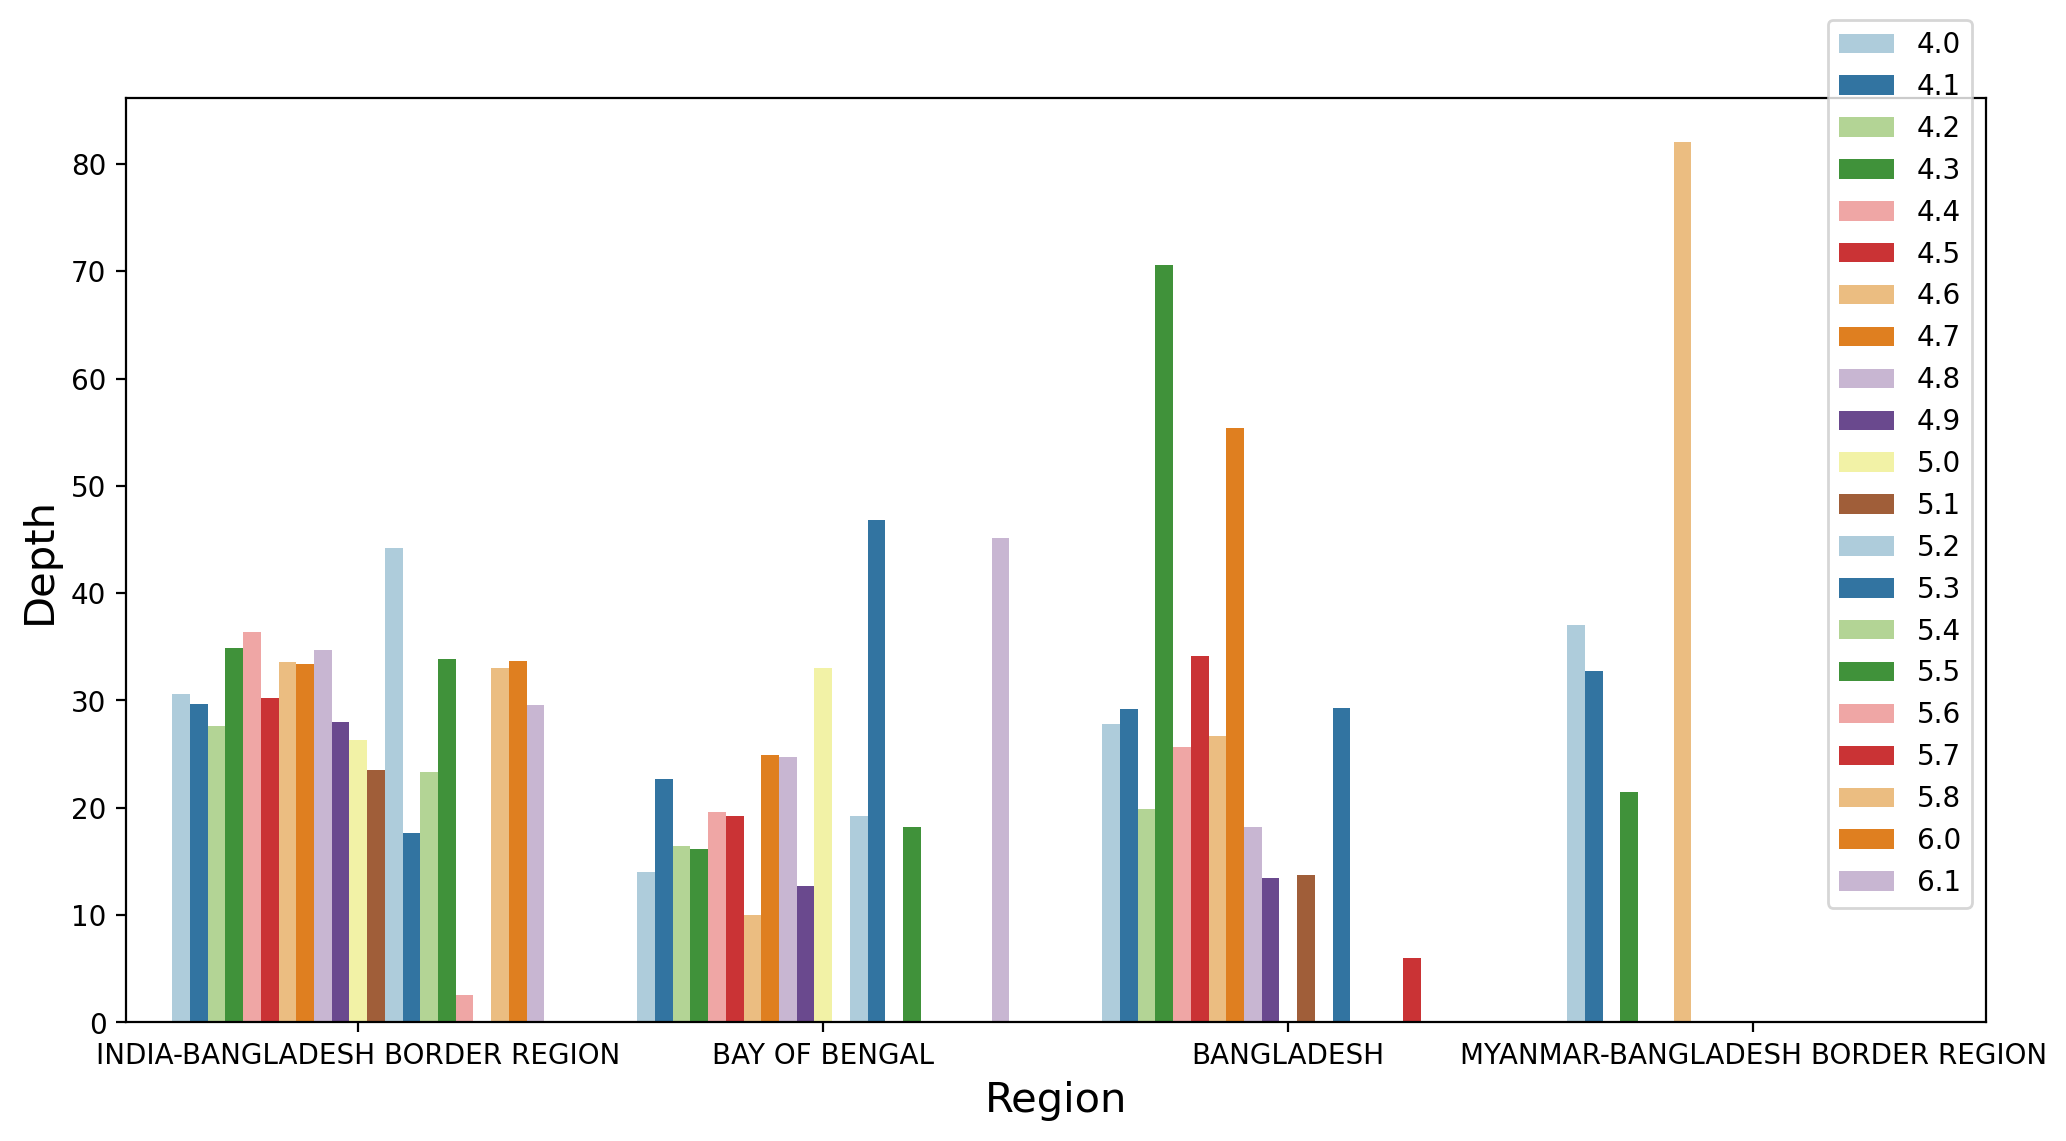

In [42]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x='Region',y='Depth',data=bd_data[bd_data['Mag'] >= 4], hue='Mag', errorbar = None, palette='Paired')
plt.xlabel("Region", fontsize = 15)
plt.ylabel("Depth", fontsize = 15)
plt.legend(bbox_to_anchor=(1, 1.1))
plt.show()

In [43]:
bd_data["Region"].unique()

array(['INDIA-BANGLADESH BORDER REGION', 'BAY OF BENGAL', 'BANGLADESH',
       'MYANMAR-BANGLADESH BORDER REGION'], dtype=object)

# Average EQ magnitude of the India-Bangladesh border

In [44]:
bd_data[bd_data['Region'] == 'INDIA-BANGLADESH BORDER REGION']["Mag"].mean()

3.9647058823529413

# Average EQ magnitude of the bay of bengal

In [45]:
bd_data[bd_data['Region'] == 'BAY OF BENGAL']["Mag"].mean()

4.0740384615384615

# Average EQ magnitude of the land area of Bangladesh

In [46]:
bd_data[bd_data['Region'] == 'BANGLADESH']["Mag"].mean()

3.9583333333333335

# Average EQ magnitude of the Myanmar-Bangladesh border

In [ ]:
bd_data[bd_data['Region'] == 'MYANMAR-BANGLADESH BORDER REGION']["Mag"].mean()

3.8562499999999997

In [ ]:
## month, year, region, mean, time-series, depth

#Recalling the dataset

In [47]:
bd_data.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2021,11,20,07:42:12,25.9469,91.5133,34.2,4.1,INDIA-BANGLADESH BORDER REGION,1637394132
1,2021,7,9,07:46:23,25.9749,90.3995,10.0,4.3,INDIA-BANGLADESH BORDER REGION,1625816783
2,2021,7,7,03:15:24,25.9603,90.3499,10.0,5.3,INDIA-BANGLADESH BORDER REGION,1625627724
3,2021,2,24,18:16:46,20.0522,91.0042,10.0,4.5,BAY OF BENGAL,1614190606
4,2020,11,2,19:43:17,25.7773,91.1728,10.0,4.5,INDIA-BANGLADESH BORDER REGION,1604346197


# Looking at the uniques entries of the "Year" column of the dataset

In [48]:
bd_data["Year"].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1974, 1973, 1971, 1970])

# Considering only the 70's datas of the dataset

In [49]:
y_70_79 = bd_data[bd_data["Year"] < 1980]

In [50]:
y_70_79

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
628,1979,5,12,06:10:08,23.9519,92.4323,27.3,4.7,INDIA-BANGLADESH BORDER REGION,295337408
629,1979,4,11,16:08:12,25.9761,88.8424,33.0,4.8,INDIA-BANGLADESH BORDER REGION,292694892
630,1979,2,26,06:54:56,25.9754,91.2331,53.5,4.2,INDIA-BANGLADESH BORDER REGION,288860096
631,1979,1,28,06:06:38,24.8735,91.0199,41.5,4.9,INDIA-BANGLADESH BORDER REGION,286351598
632,1979,1,9,02:39:55,24.9587,92.4872,64.1,4.4,INDIA-BANGLADESH BORDER REGION,284697595
633,1978,10,4,07:02:34,16.5416,90.7245,33.0,4.4,BAY OF BENGAL,276332554
634,1978,4,23,07:49:51,19.1587,89.1563,0.0,4.2,BAY OF BENGAL,262165791
635,1978,4,7,23:32:35,22.7958,92.3806,48.6,4.6,INDIA-BANGLADESH BORDER REGION,260839955
636,1978,3,28,12:37:40,23.1509,92.7404,33.0,4.8,INDIA-BANGLADESH BORDER REGION,259936660
637,1977,12,23,21:00:27,23.7076,92.3092,33.0,5.1,INDIA-BANGLADESH BORDER REGION,251758827


#Keeping a copy of the dataset

In [51]:
import copy

In [52]:
data_c = copy.deepcopy(bd_data)

# Looking at the uniques entries of the "Month" column of the dataset

In [53]:
data_c["Month"].unique()

array([11,  7,  2, 10,  8,  6,  1,  5,  3, 12,  9,  4])

# Encoding the month numbers into names

In [54]:
data_c["Month_Name"] = data_c["Month"]
data_c["Month_Name"]=data_c["Month_Name"].replace({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                             8: "August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [55]:
data_c.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp,Month_Name
0,2021,11,20,07:42:12,25.9469,91.5133,34.2,4.1,INDIA-BANGLADESH BORDER REGION,1637394132,November
1,2021,7,9,07:46:23,25.9749,90.3995,10.0,4.3,INDIA-BANGLADESH BORDER REGION,1625816783,July
2,2021,7,7,03:15:24,25.9603,90.3499,10.0,5.3,INDIA-BANGLADESH BORDER REGION,1625627724,July
3,2021,2,24,18:16:46,20.0522,91.0042,10.0,4.5,BAY OF BENGAL,1614190606,February
4,2020,11,2,19:43:17,25.7773,91.1728,10.0,4.5,INDIA-BANGLADESH BORDER REGION,1604346197,November


# Checking the frequency of the months in the dataset

In [56]:
data_c["Month_Name"].value_counts()

Month_Name
July         71
November     63
August       62
October      59
February     56
January      55
June         52
April        50
May          47
December     47
September    44
March        40
Name: count, dtype: int64

# Visualizing the frequency of the months in the dataset

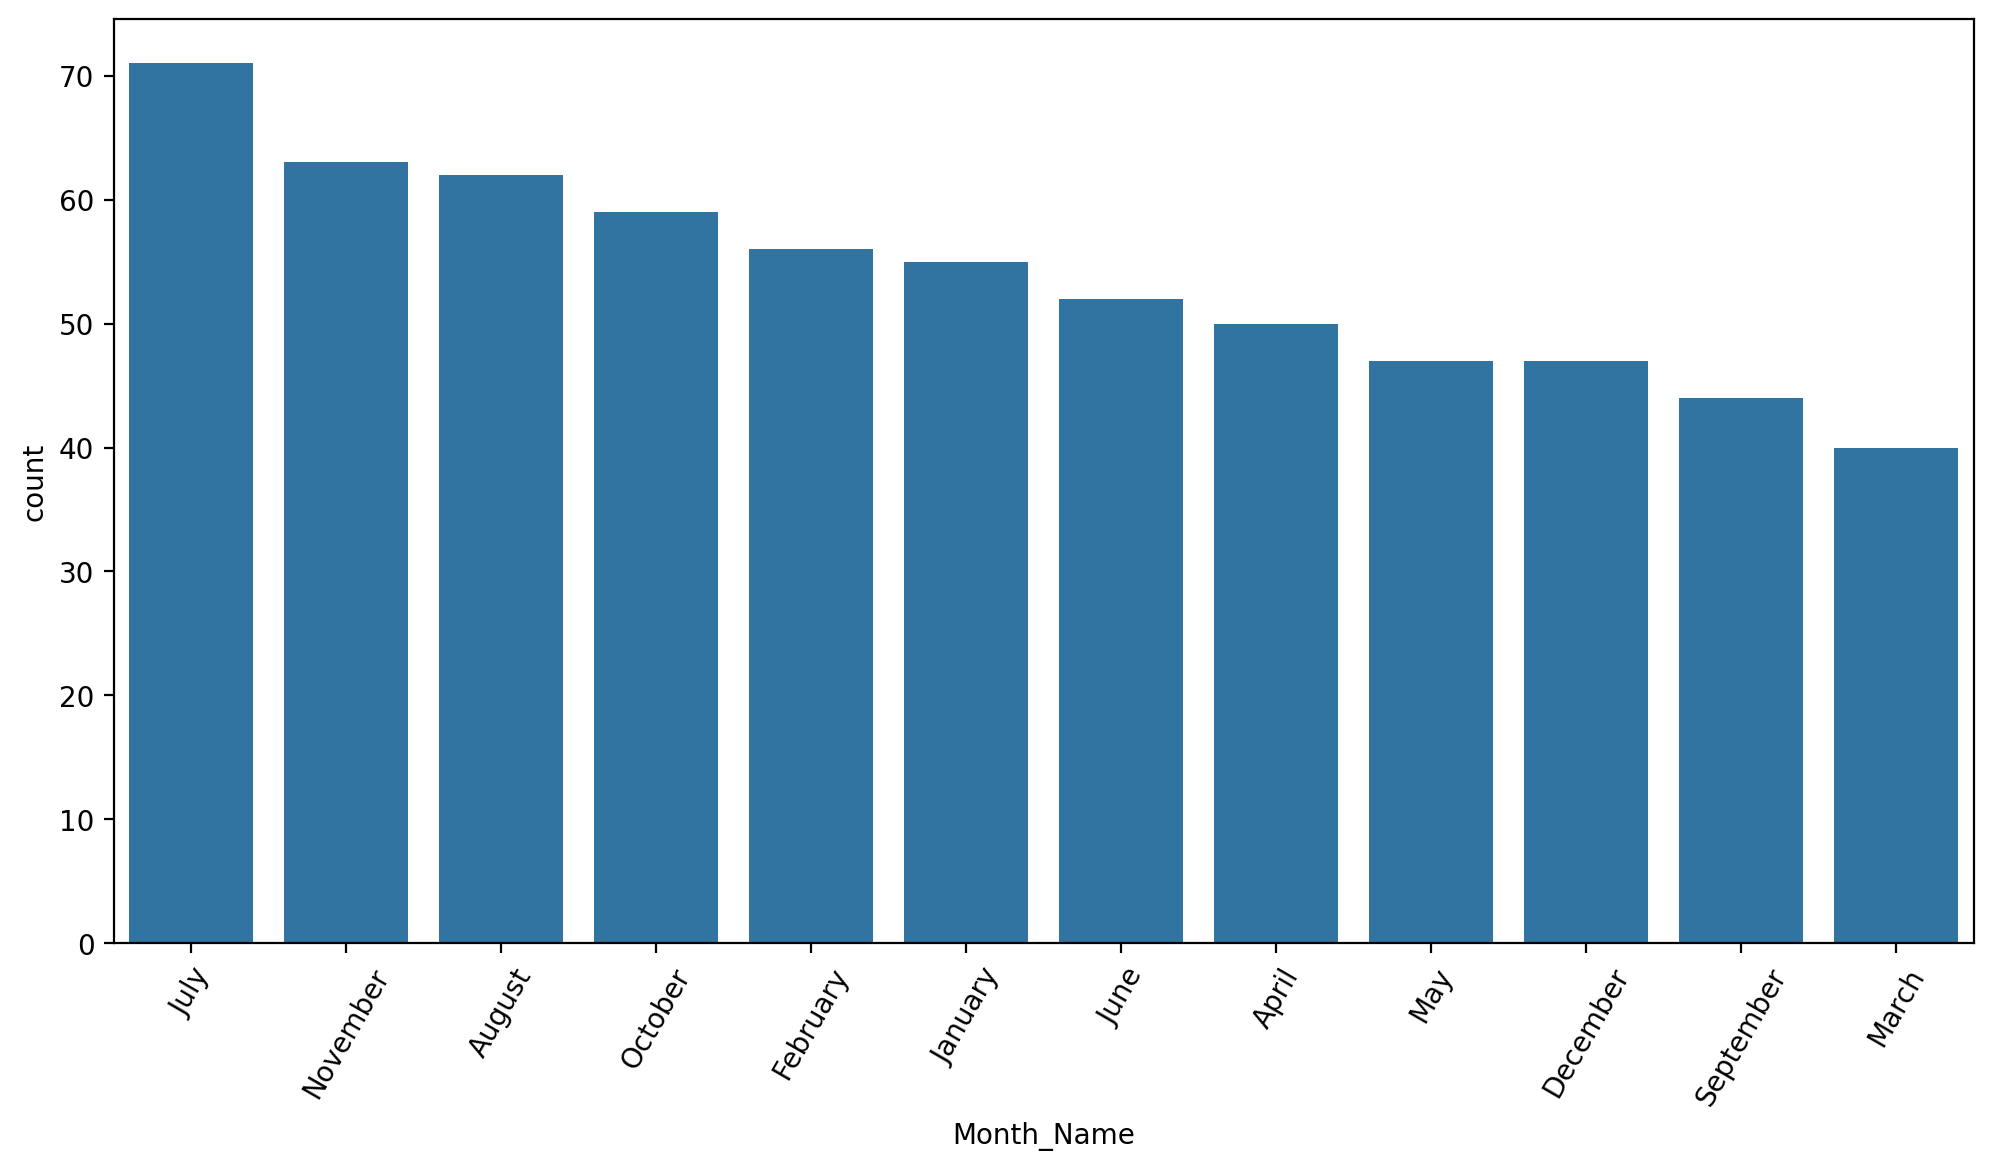

In [57]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(x='Month_Name',data=data_c,order = data_c['Month_Name'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

# Monthwise EQ depth and magnitude

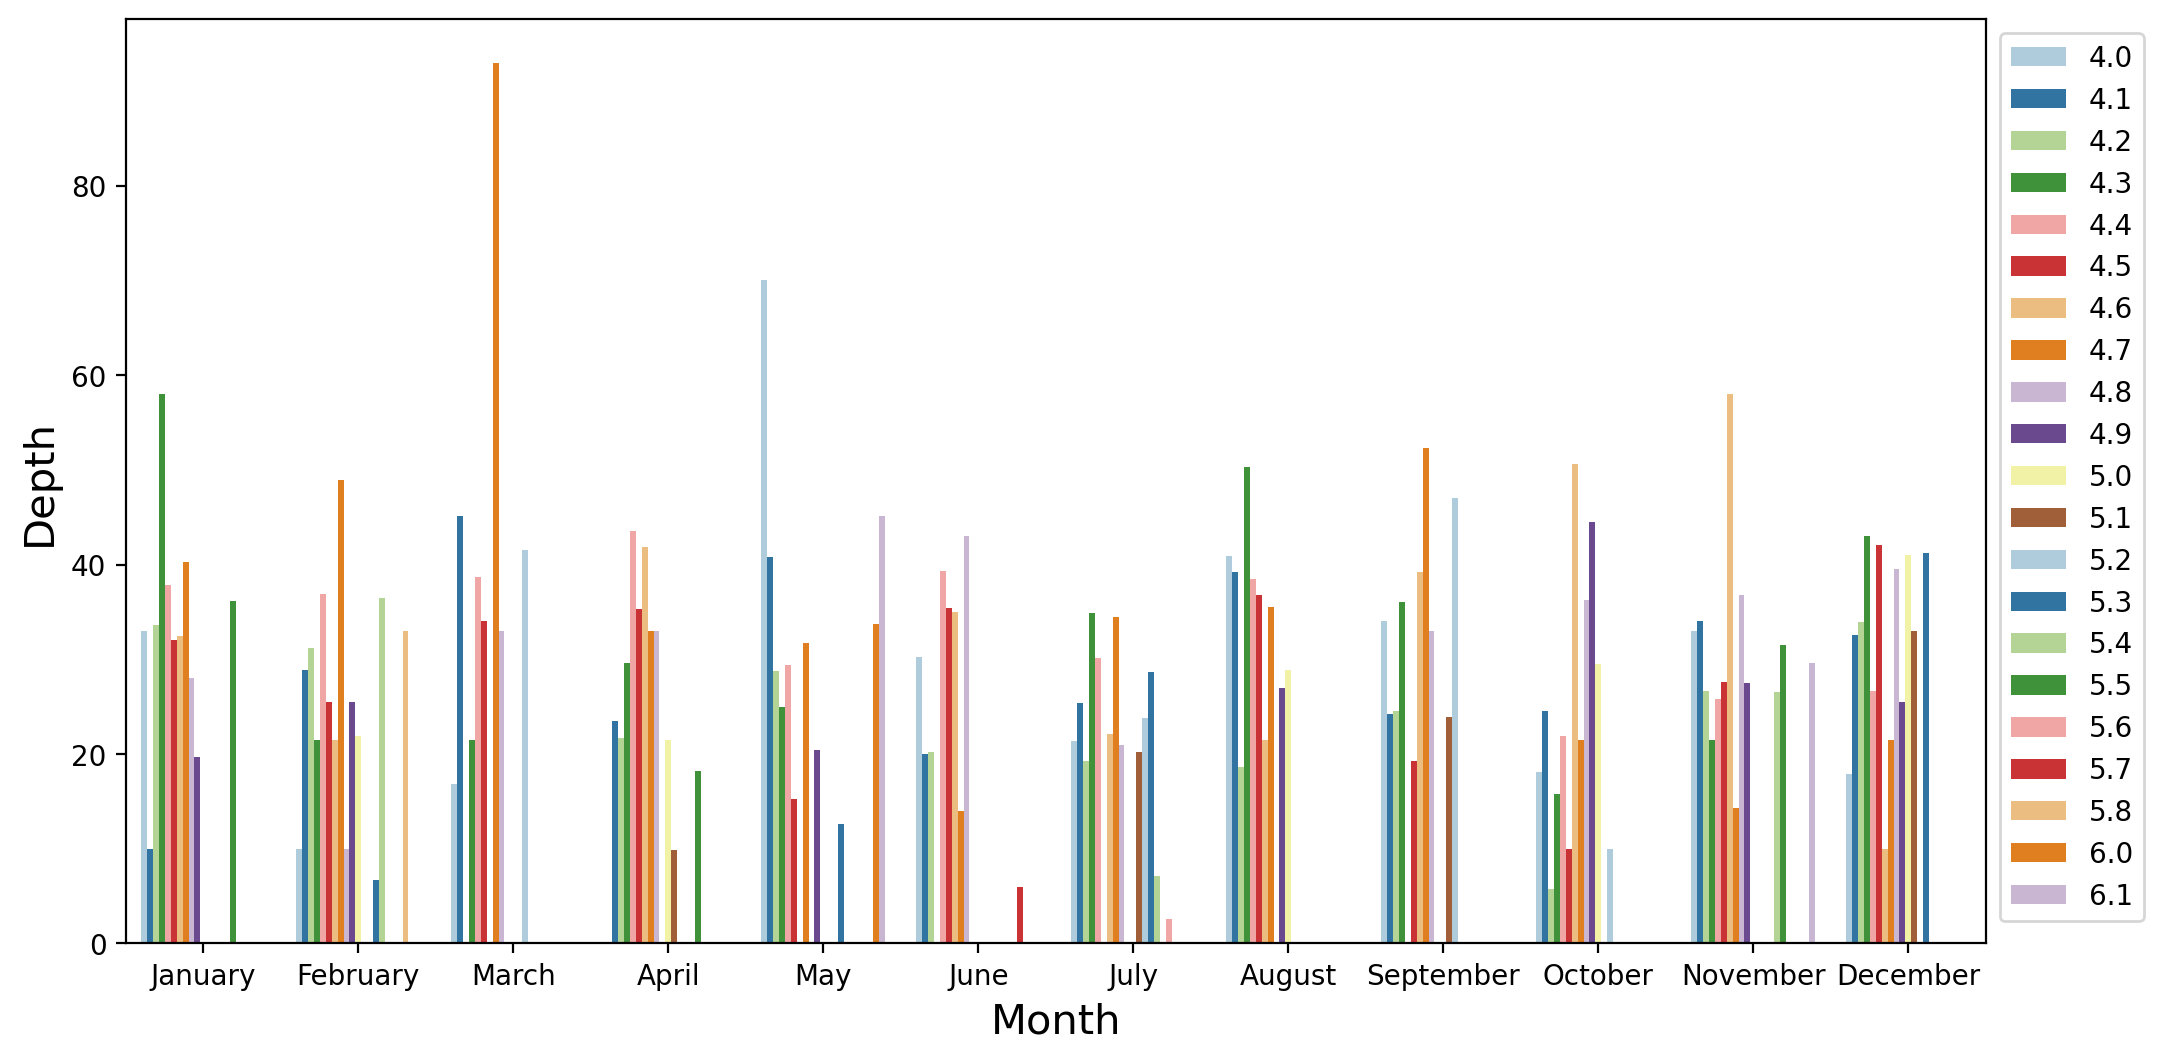

In [59]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x='Month_Name',y='Depth',data=data_c[data_c['Mag'] >= 4], hue='Mag', errorbar = None, palette='Paired', order =["January", "February", "March", "April", "May", "June", "July","August", "September", "October", "November", "December"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Depth", fontsize = 15)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Monthwise count of the magnitude

(0.0, 7.0)

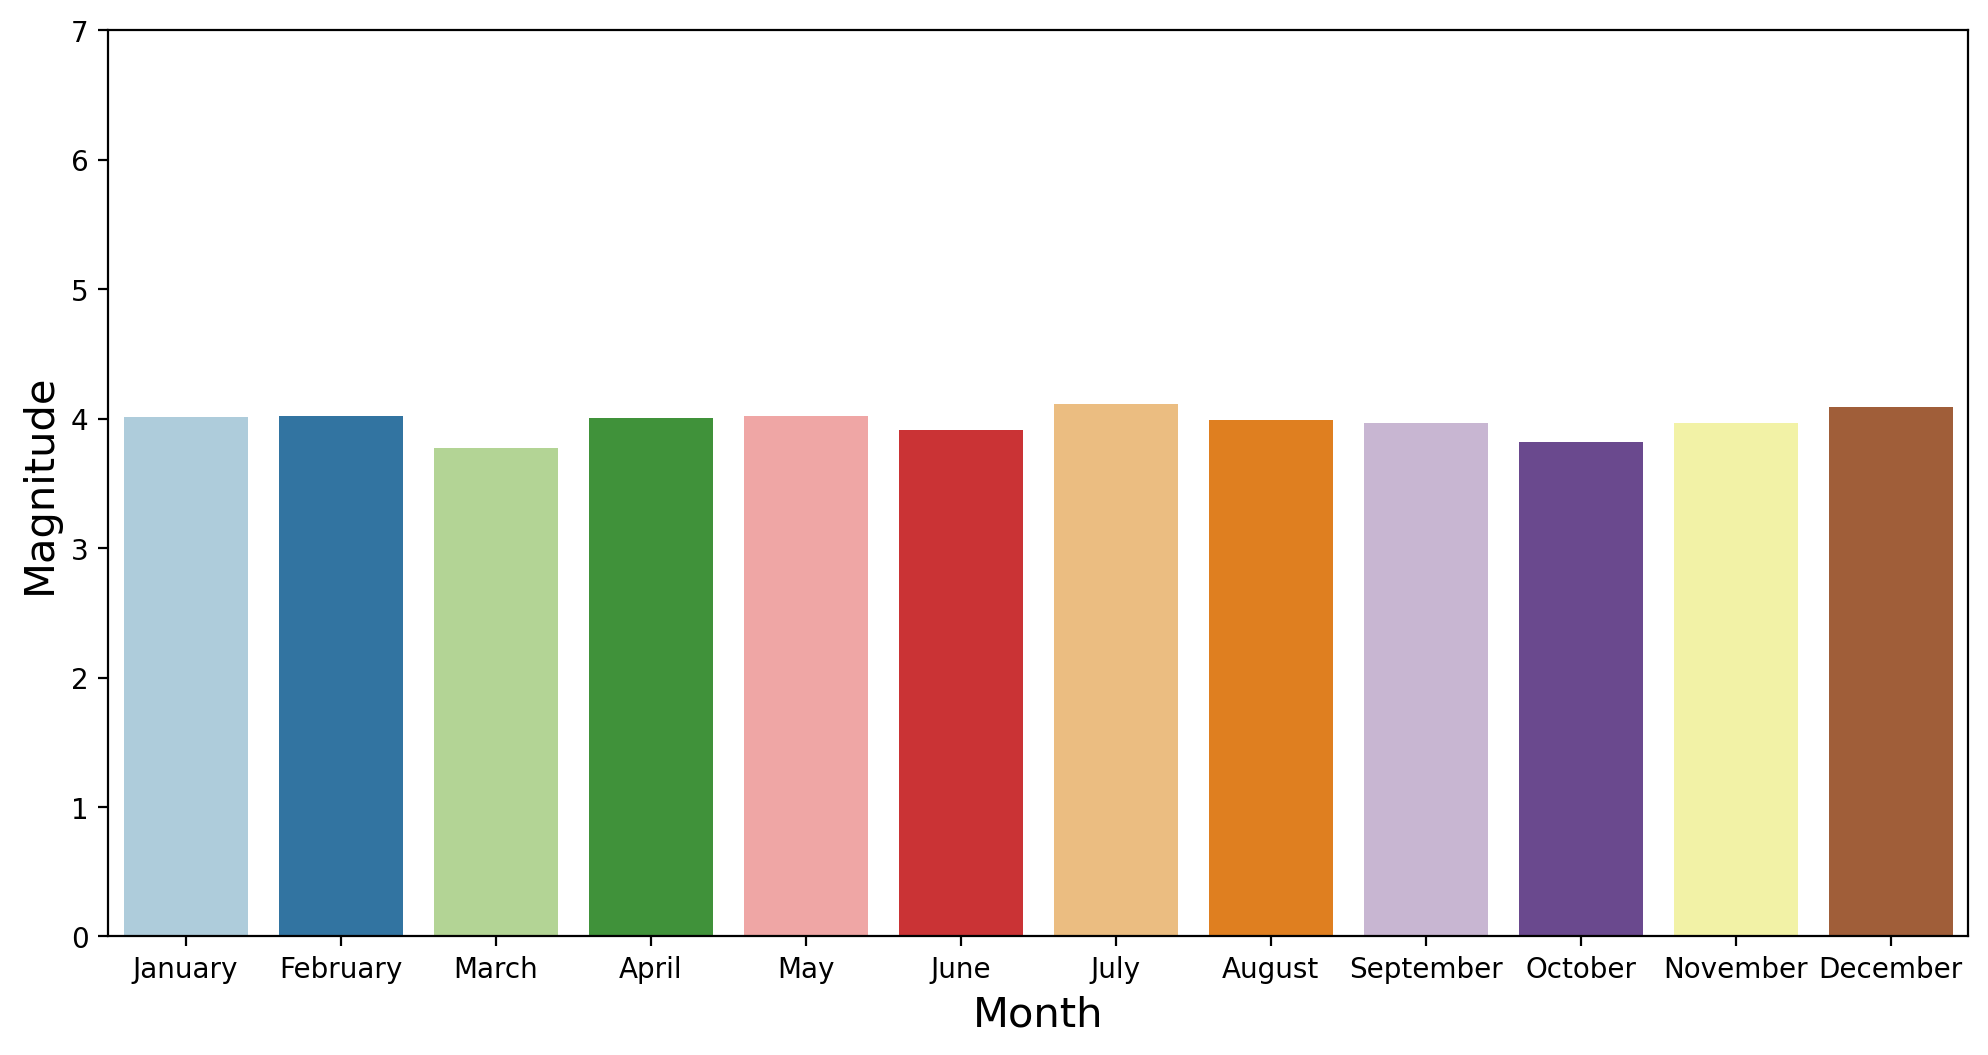

In [ ]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x='Month_Name',y='Mag',data=data_c, ci = None, palette='Paired', order = ["January", "February", "March", "April", "May", "June", "July","August", "September", "October", "November", "December"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Magnitude", fontsize = 15)
plt.ylim(0, 7)
#plt.legend(bbox_to_anchor=(1, 1.1))

# Average magnitude of each month

In [61]:
data_c["Mag"].groupby(data_c["Month_Name"], sort=False).mean()

Month_Name
November     3.965079
July         4.111268
February     4.017857
October      3.816949
August       3.987097
June         3.915385
January      4.012727
May          4.019149
March        3.775000
December     4.091489
September    3.965909
April        4.004000
Name: Mag, dtype: float64

# Month and regionwise EQ magnitudes

```

Region:        Highest| Lowest

Bay of bengal - July | March

India-Bangladesh border - January, November, December | October

Bangladesh - December | October

Myanmar-Bangladesh border - July | August

Observation: Less earthquake occurs during the end of a year on land and at the beginning of a year on water
```

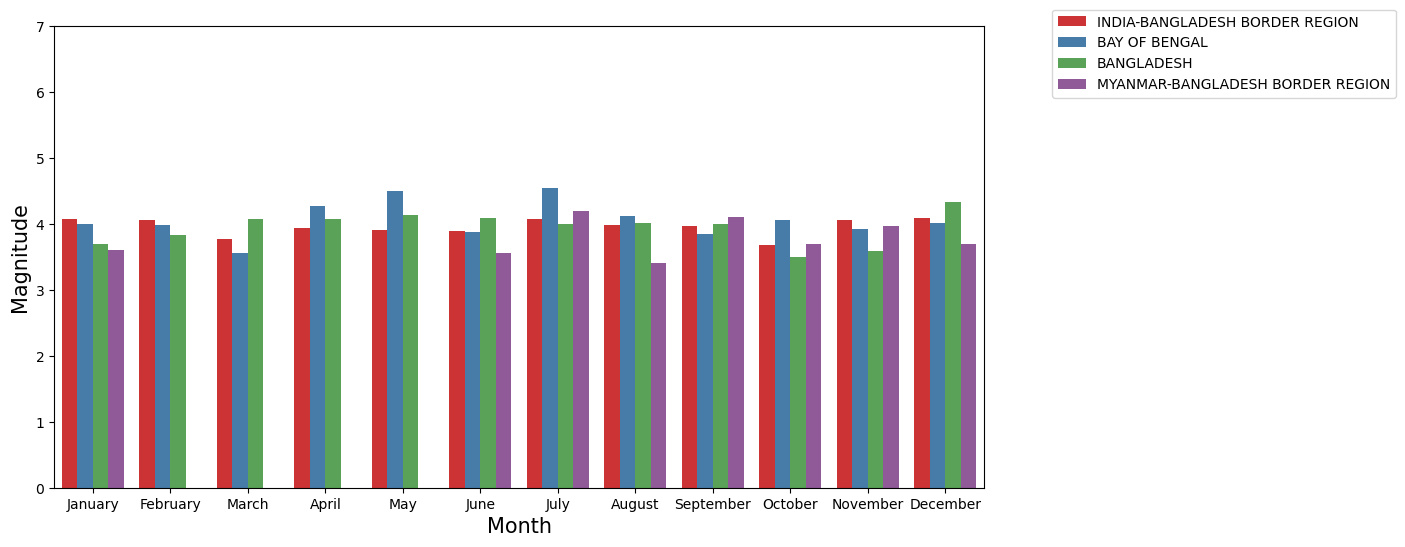

In [63]:
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x='Month_Name',y='Mag',data=data_c, hue = "Region", errorbar = None, palette='Set1', 
            order = ["January", "February", "March", "April", "May", "June", "July","August", "September", 
                     "October", "November", "December"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Magnitude", fontsize = 15)
plt.ylim(0, 7)
plt.legend(bbox_to_anchor=(1.45, 1.05))
plt.show()

# Day and regionwise EQ magnitudes

 
Region - Highest| Lowest

Bay of bengal - 21 | 19

India-Bangladesh border - 2 | 16

Bangladesh - 13 | 22

Myanmar-Bangladesh border - 15 | 25



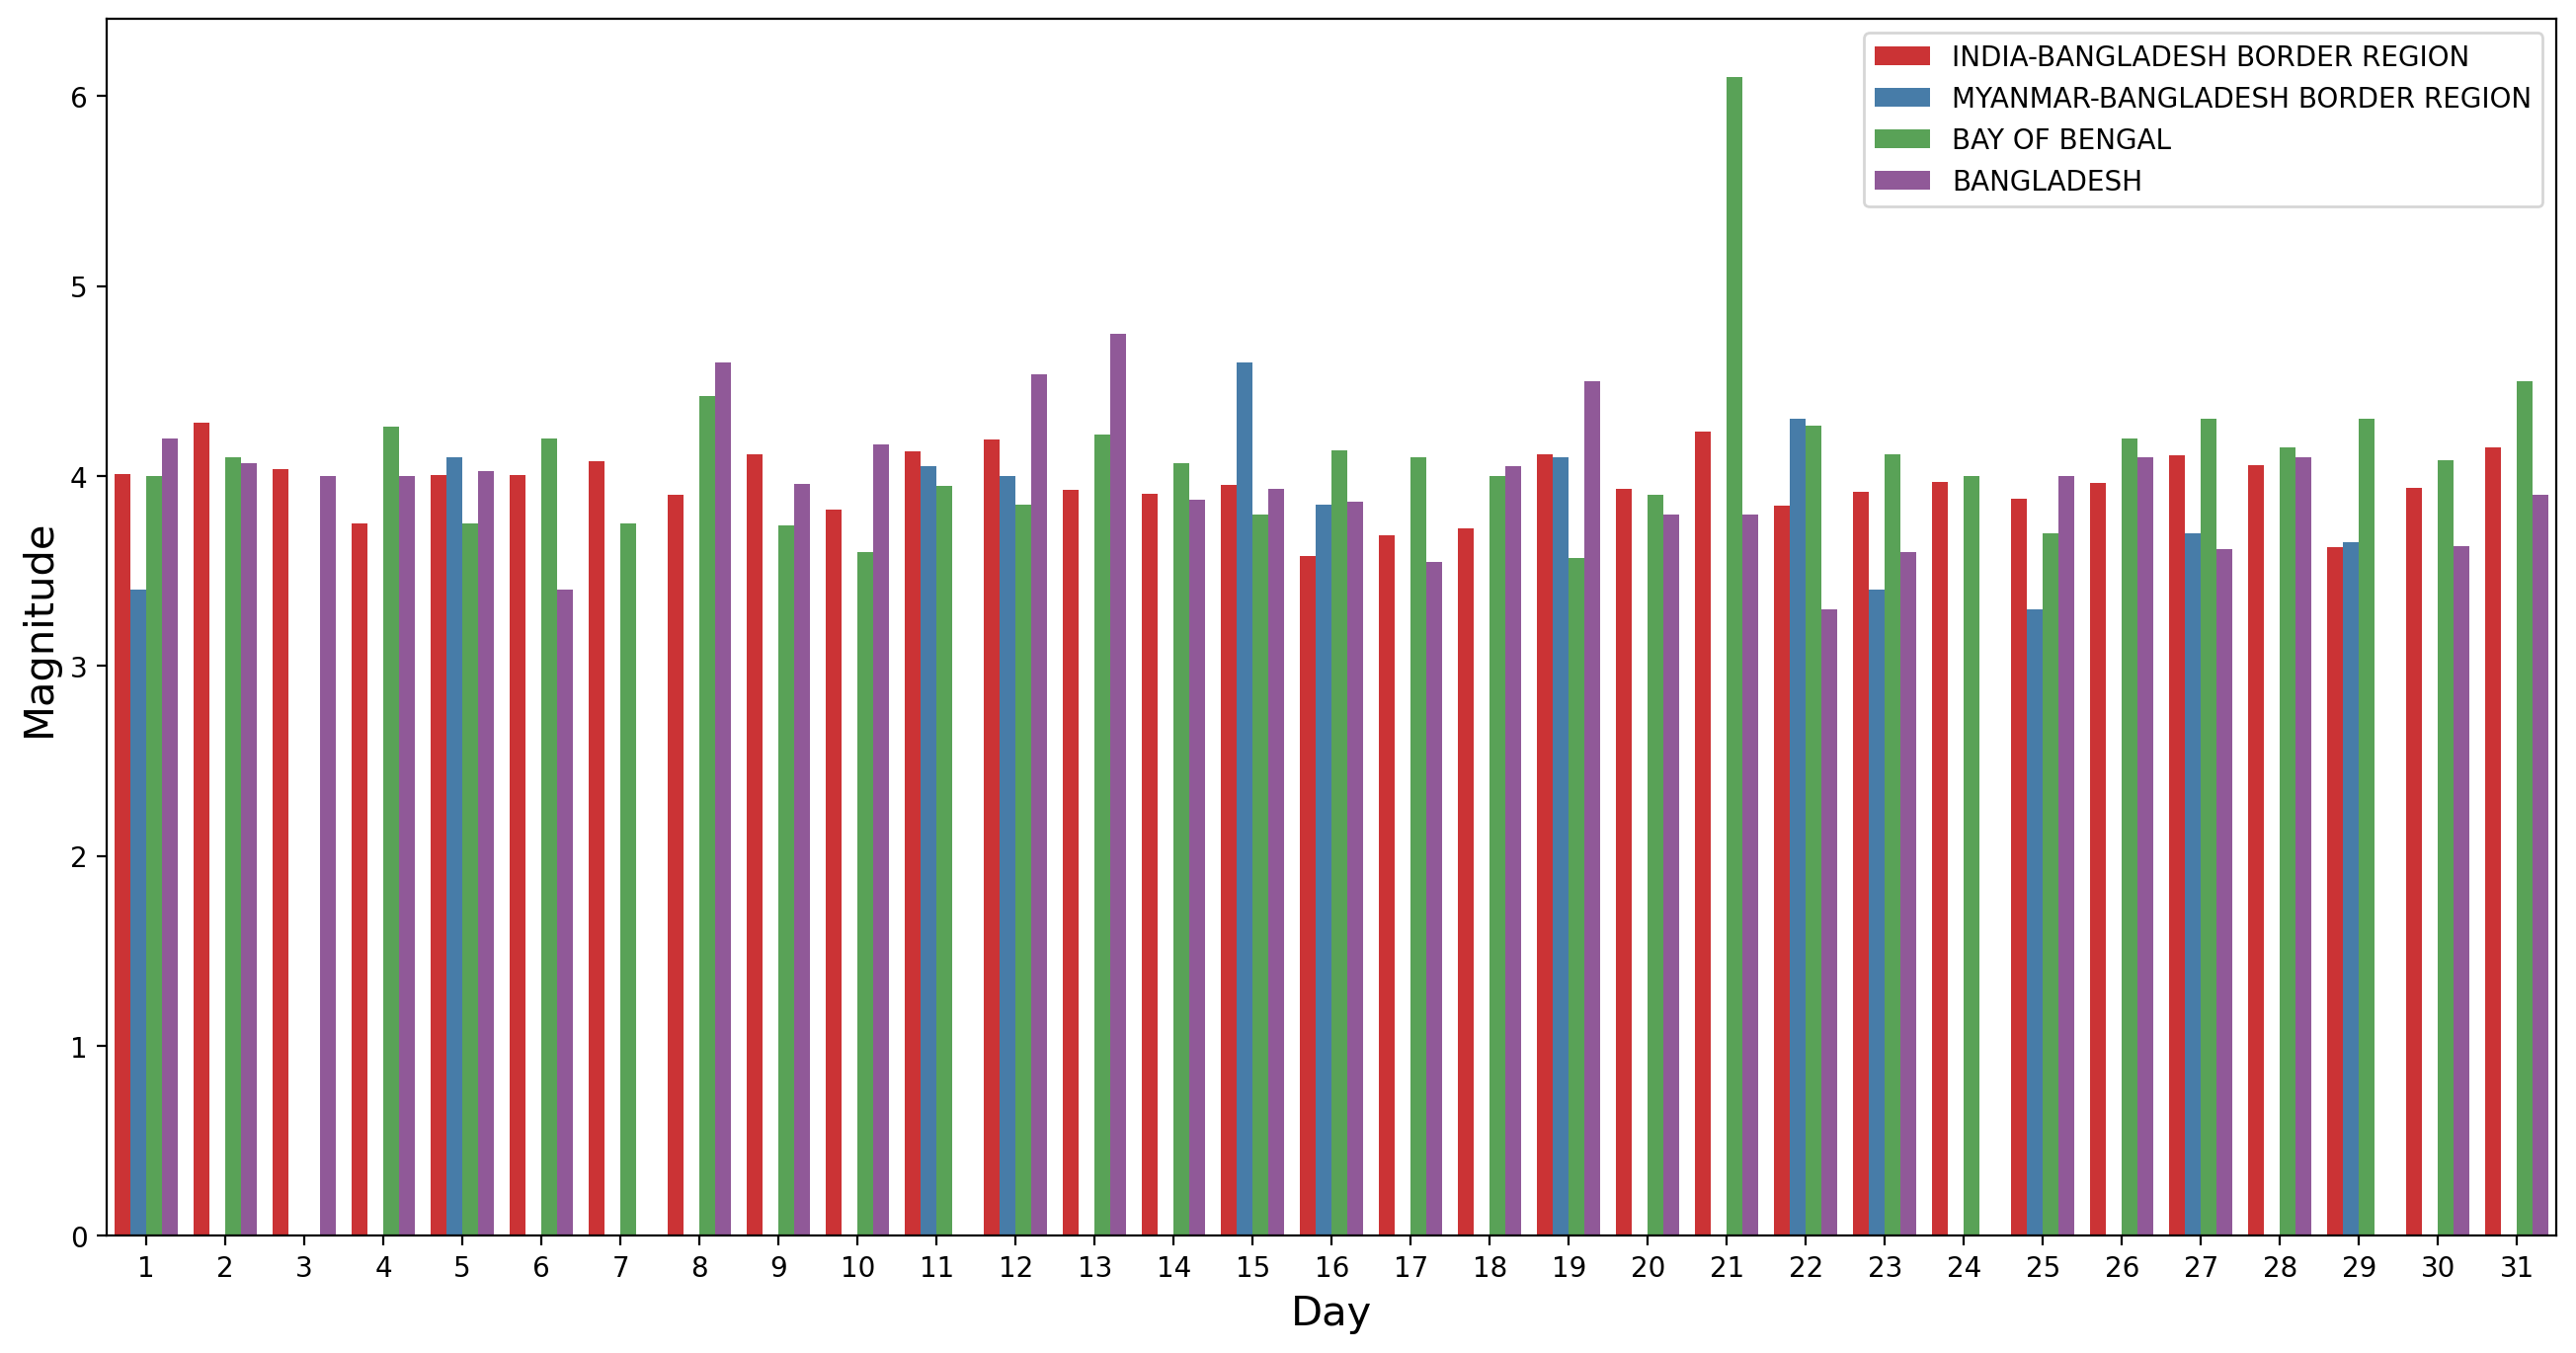

In [66]:
plt.figure(figsize=(16,8), dpi=200)
sns.barplot(x='Day',y='Mag',data=data_c, hue = "Region", errorbar = None, palette='Set1', order = list(range(1,32)))
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Magnitude", fontsize = 15)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Daywise EQ magnitudes on any given month



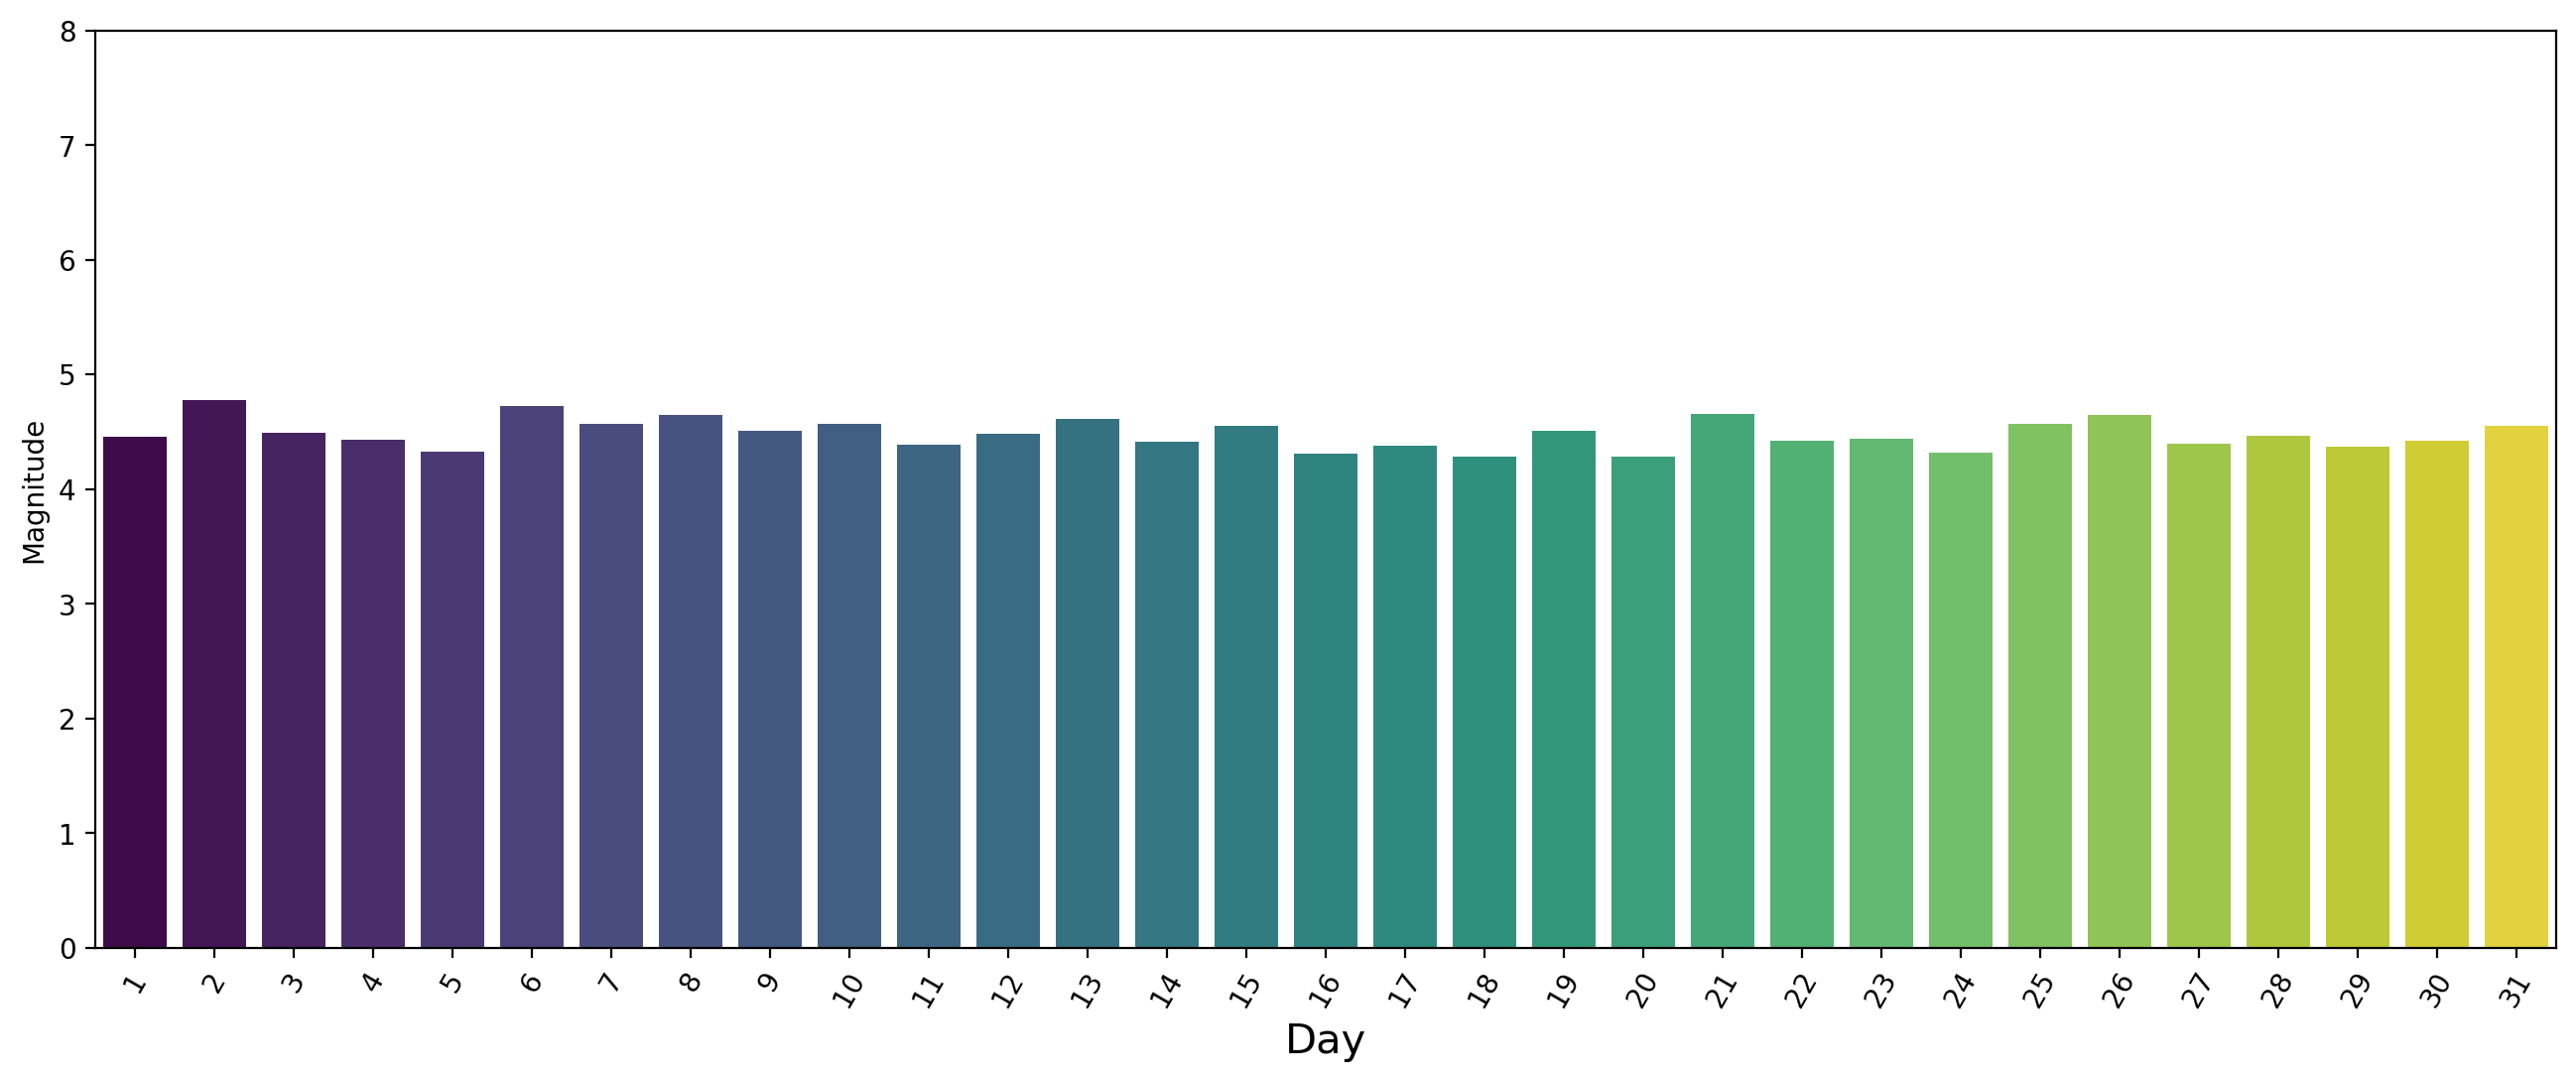

In [75]:
plt.figure(figsize=(16,6),dpi=200)
sns.barplot(x='Day',y = "Mag", data=data_c[data_c["Mag"]>=4],estimator=np.mean, errorbar=None, order = list(range(1,32)), hue = 'Day', palette="viridis", legend=False)
plt.xticks(rotation=60)
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Magnitude")
plt.ylim(0,8)
plt.show()

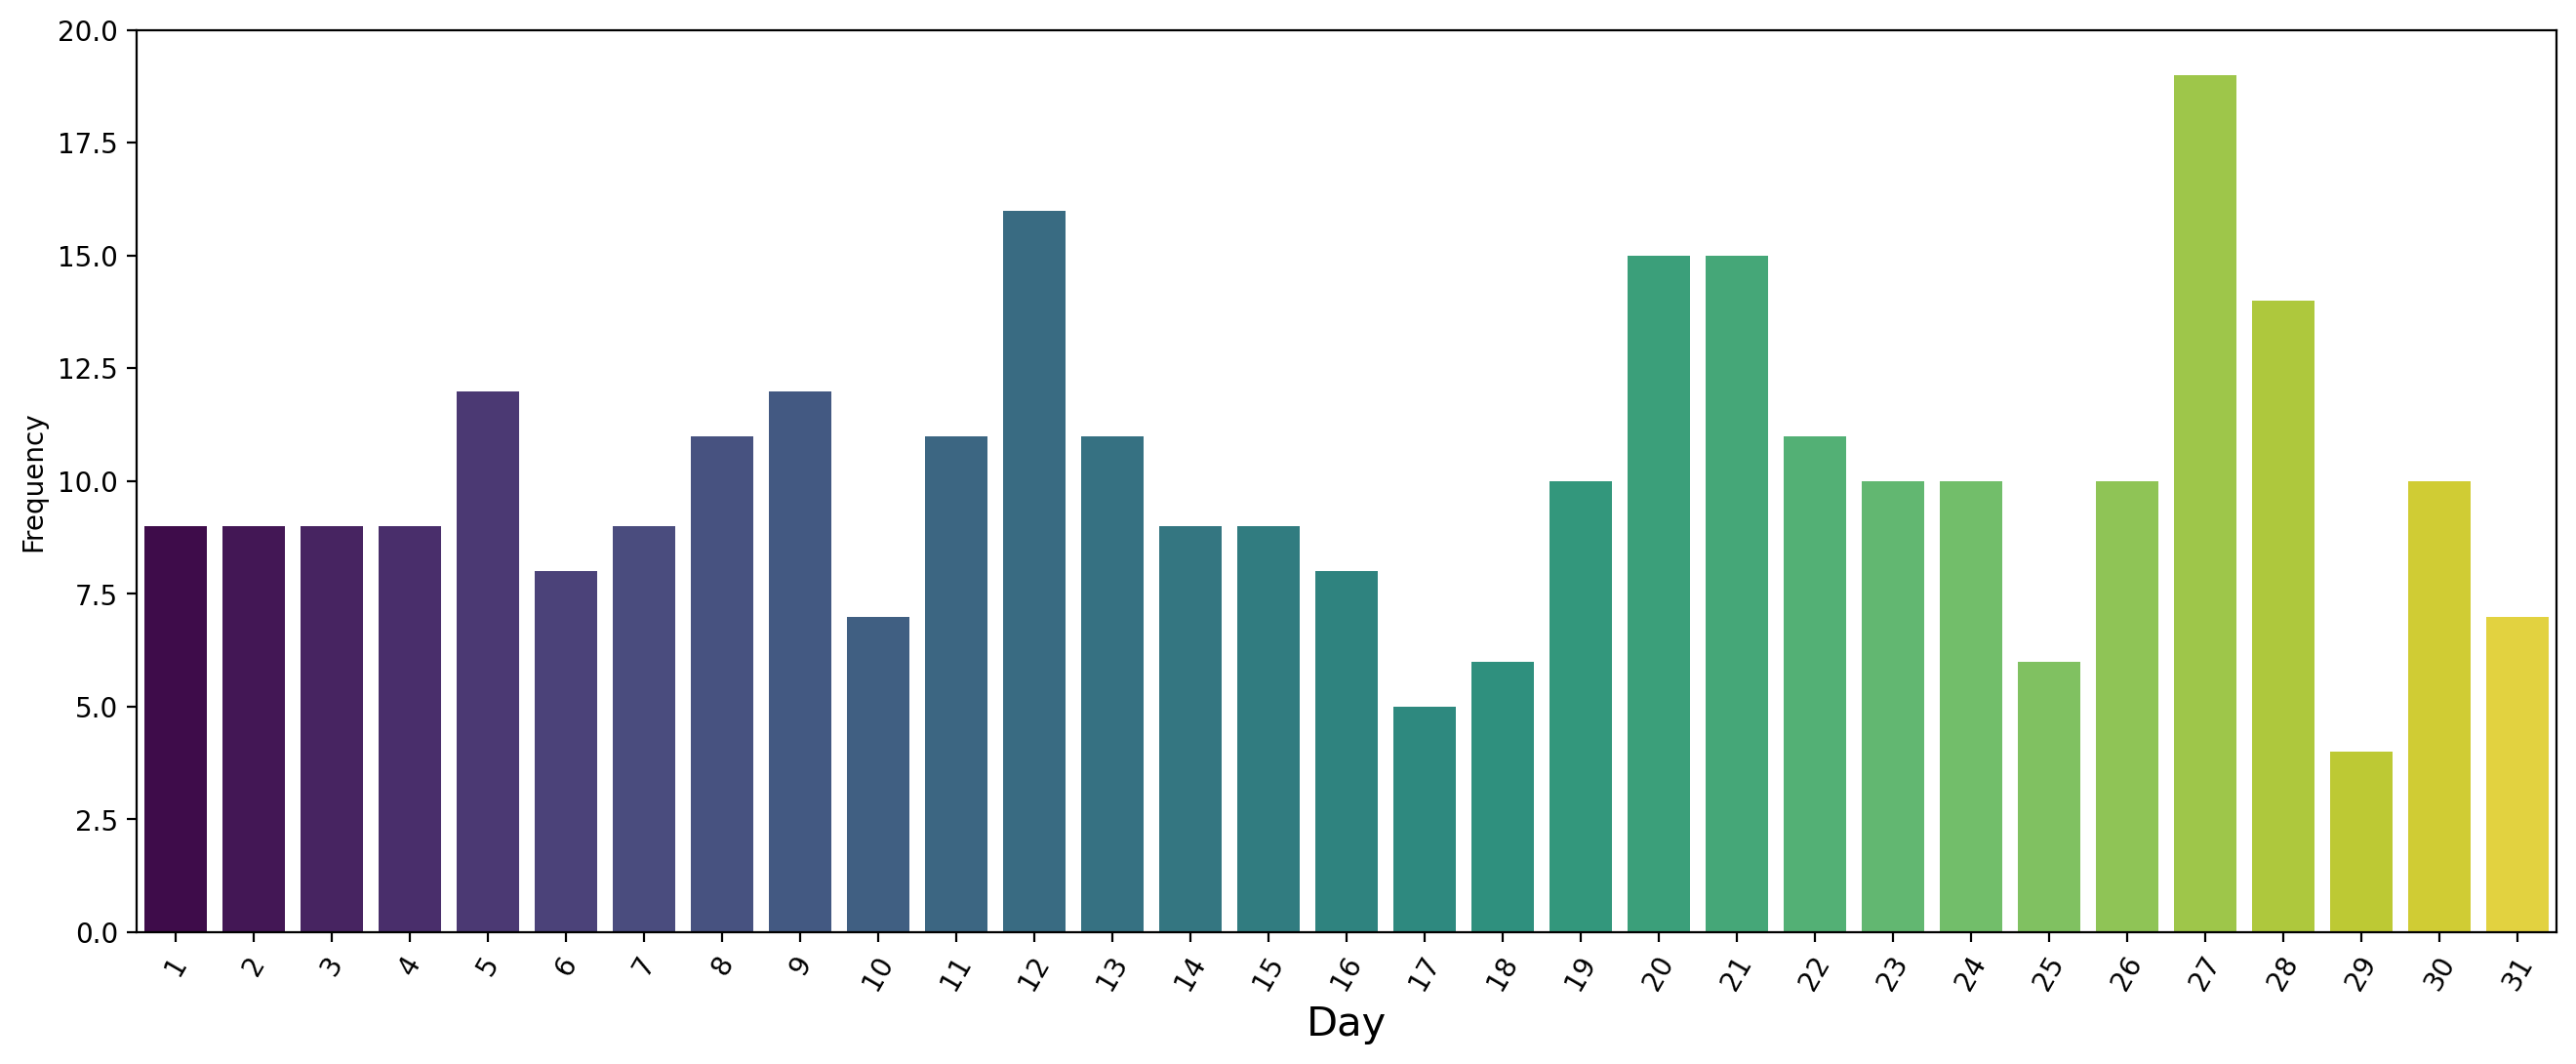

In [76]:
plt.figure(figsize=(16,6),dpi=200)
sns.countplot(x='Day', data=data_c[data_c["Mag"]>=4], order = list(range(1,32)), hue = 'Day', palette="viridis", legend=False)
plt.xticks(rotation=60)
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Frequency")
plt.ylim(0,20)
plt.show()

# Adding a new column named "Decades" in the dataset

In [77]:
data_c['Decades'] = data_c["Year"]

### Considering every 10 years as a decade in the dataset

In [78]:
for i in data_c['Decades']:
    if i in range(1970,1980):
        data_c["Decades"] = data_c["Decades"].replace({i:"1970-79"})
    elif i in range(1980,1990):
        data_c["Decades"] = data_c["Decades"].replace({i:"1980-89"})
    elif i in range(1990,2000):
        data_c["Decades"] = data_c["Decades"].replace({i:"1990-99"})
    elif i in range(2000,2010):
        data_c["Decades"] = data_c["Decades"].replace({i:"2000-09"})
    elif i in range(2010,2020):
        data_c["Decades"] = data_c["Decades"].replace({i:"2010-19"})
    elif i in range(2020,2023):
        data_c["Decades"] = data_c["Decades"].replace({i:"2020-22"})

# Looking at the new dataset

In [79]:
data_c.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp,Month_Name,Decades
0,2021,11,20,07:42:12,25.9469,91.5133,34.2,4.1,INDIA-BANGLADESH BORDER REGION,1637394132,November,2020-22
1,2021,7,9,07:46:23,25.9749,90.3995,10.0,4.3,INDIA-BANGLADESH BORDER REGION,1625816783,July,2020-22
2,2021,7,7,03:15:24,25.9603,90.3499,10.0,5.3,INDIA-BANGLADESH BORDER REGION,1625627724,July,2020-22
3,2021,2,24,18:16:46,20.0522,91.0042,10.0,4.5,BAY OF BENGAL,1614190606,February,2020-22
4,2020,11,2,19:43:17,25.7773,91.1728,10.0,4.5,INDIA-BANGLADESH BORDER REGION,1604346197,November,2020-22


# Counting the decade frequency of the dataset

In [80]:
data_c['Decades'].value_counts()

Decades
2000-09    252
2010-19    189
1990-99    128
1980-89     48
1970-79     18
2020-22     11
Name: count, dtype: int64

# Decadewise Visualizing the Earthquakes

Observation: Most of the earthquakes took place in the 2000-2009

Note: Current decade's Earthquake occurance rate is low as it is still ongoing and only 2 years passed.

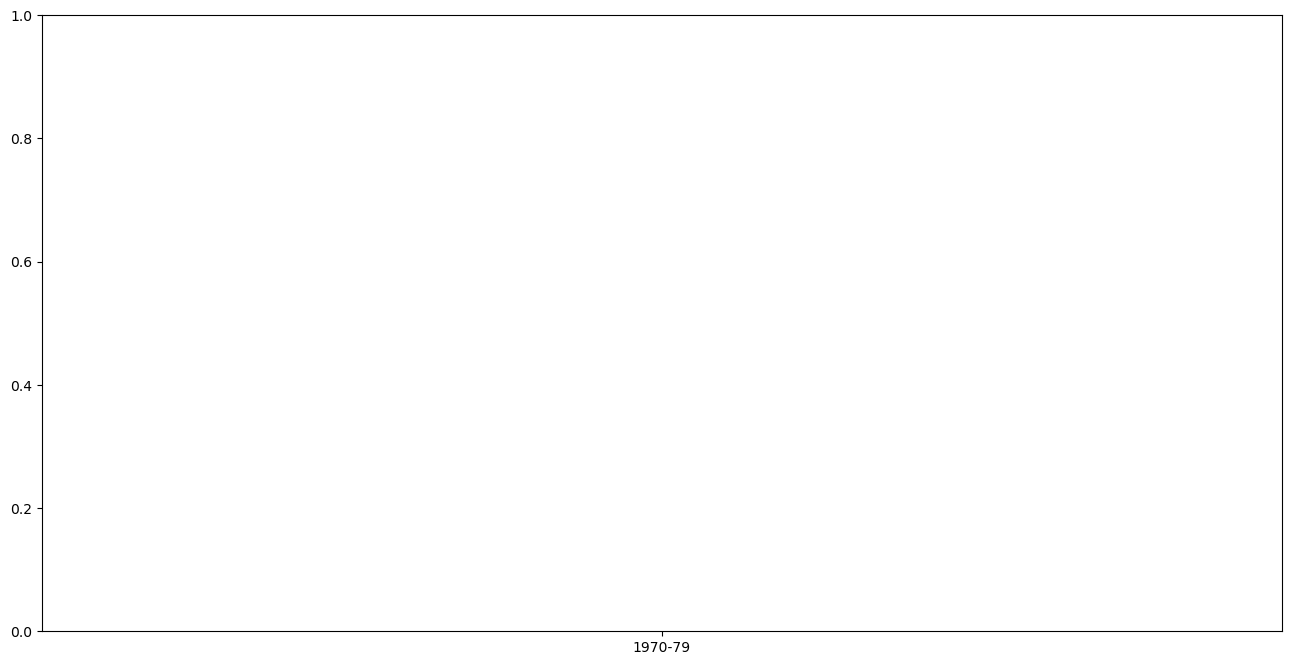

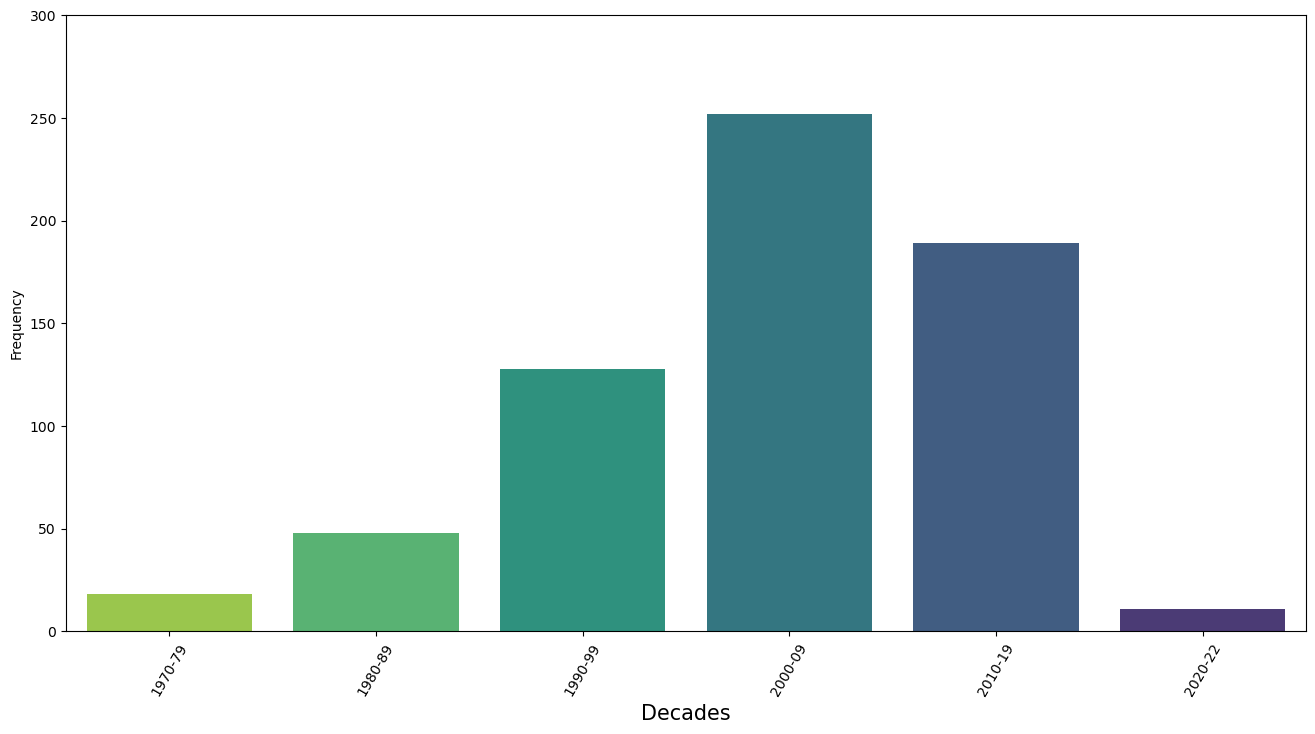

In [83]:
plt.figure(figsize=(16,8),dpi=100)
sns.countplot(x='Decades', data=data_c, order = ['1970-79', '1980-89', '1990-99', '2000-09', '2010-19', "2020-22"], 
              hue = 'Decades', palette="viridis", legend=False)
plt.xticks(rotation=60)
plt.xlabel("Decades", fontsize = 15)
plt.ylabel("Frequency")
plt.ylim(0,300)
plt.show()

In [84]:
data_c["Depth"].max()

144.9

In [85]:
# bd_data.to_csv("BD_EQ.csv", index=False)

In [86]:
# date = []
# for i,j,k in zip(bd_data["Day"],bd_data["Month"],bd_data["Year"]):
#     date.append(f'{i}-{j}-{k}')

In [87]:
# dic = {"Date":date}
# dic